# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
raw_df = pd.read_csv('/content/drive/MyDrive/pythondaxuly.csv')


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_url                       121 non-null    object 
 1   post_id                        121 non-null    int64  
 2   text                           118 non-null    object 
 3   post_text                      118 non-null    object 
 4   shared_text                    19 non-null     object 
 5   original_text                  73 non-null     object 
 6   time                           121 non-null    object 
 7   timestamp                      119 non-null    float64
 8   image                          56 non-null     object 
 9   image_lowquality               121 non-null    object 
 10  images                         121 non-null    object 
 11  images_description             121 non-null    object 
 12  images_lowquality              121 non-null    obj

In [ ]:
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [ ]:
reactions

{'thích': 24861,
 'yêu thích': 5997,
 'haha': 12,
 'wow': 10,
 'thương thương': 362,
 'buồn': 1,
 'phẫn nộ': 4,
 'shares': 328.0,
 'comments': 486.0}

## Reactions analysis

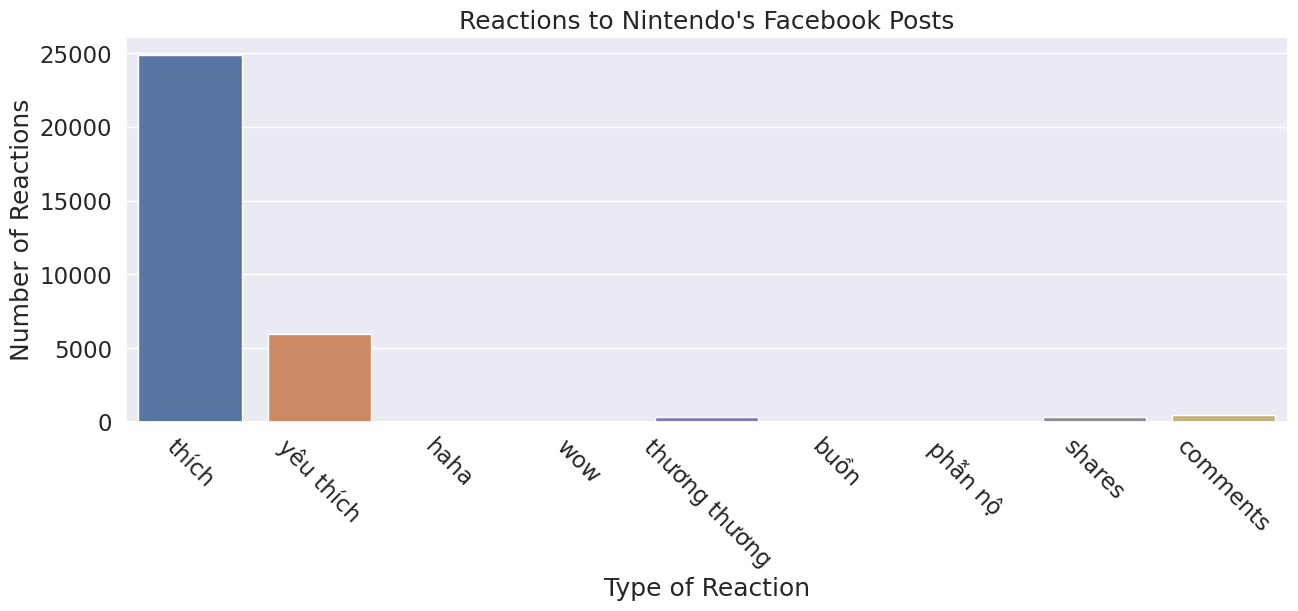

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to Nintendo's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

In [ ]:
max_reactions_index = raw_df['reaction_count'].idxmax()
post_with_most_reactions = raw_df.loc[max_reactions_index]

print("Bài viết có lượng reactions nhiều nhất:")
print(post_with_most_reactions['post_url'])
print("reactions:",post_with_most_reactions['reaction_count'],",comments:",post_with_most_reactions['comments'],",shares:",post_with_most_reactions['shares'])

Bài viết có lượng reactions nhiều nhất:
https://facebook.com/story.php?story_fbid=pfbid0p3soDRFwYFtCs9vGvcf38ETxrPXvaEaL9356jwGEhKHoyJQc1Tsipa84VVSLo7xfl&id=100044545204715
reactions: 354143.0 ,comments: 1140.0 ,shares: 2720.0


In [ ]:
max_comments_index = raw_df['comments'].idxmax()
post_with_most_comments = raw_df.loc[max_comments_index]

print("Bài viết có lượng comments nhiều nhất:")
print(post_with_most_comments['post_url'])
print("reactions:",post_with_most_comments['reaction_count'],",comments:",post_with_most_comments['comments'],",shares:",post_with_most_comments['shares'])

Bài viết có lượng comments nhiều nhất:
https://facebook.com/LiverpoolFC/posts/902035197957979
reactions: 21140.0 ,comments: 3836.0 ,shares: 590.0


In [ ]:
max_shares_index = raw_df['shares'].idxmax()
post_with_most_shares = raw_df.loc[max_shares_index]

print("Bài viết có lượng shares nhiều nhất:")
print(post_with_most_shares['post_url'])
print("reactions:",post_with_most_shares['reaction_count'],",shares:",post_with_most_shares['comments'],",shares:",post_with_most_shares['shares'])

Bài viết có lượng shares nhiều nhất:
https://facebook.com/LiverpoolFC/posts/902088164619349
reactions: 69461.0 ,shares: 3023.0 ,shares: 6193.0


In [ ]:
min_reactions_index = raw_df['reaction_count'].idxmin()
post_with_bad_reactions = raw_df.loc[min_reactions_index]

print("Bài viết có lượng reactions và shares ít nhất:")
print(post_with_bad_reactions['post_url'])
print("reactions:",post_with_bad_reactions['reaction_count'],",shares:",post_with_bad_reactions['comments'],",shares:",post_with_bad_reactions['shares'])

Bài viết có lượng reactions và shares ít nhất:
https://facebook.com/LiverpoolFC/posts/902118821282950
reactions: 1459.0 ,shares: 53.0 ,shares: 18.0


In [ ]:
min_comments_index = raw_df['comments'].idxmin()
post_with_bad_comments = raw_df.loc[min_comments_index]

print("Bài viết có lượng comments ít nhất:")
print(post_with_bad_comments['post_url'])
print("reactions:",post_with_bad_comments['reaction_count'],",shares:",post_with_bad_comments['comments'],",shares:",post_with_bad_reactions['shares'])

Bài viết có lượng comments ít nhất:
https://facebook.com/story.php?story_fbid=pfbid0U3dQJGxJYLNknsiGPcP8vQviqqLq5JVfzAWu1wLCcgK5E4v18bE3nx1Q9sqhN5JKl&id=100044545204715
reactions: 2910.0 ,shares: 30.0 ,shares: 18.0


In [ ]:
min_shares_index = raw_df['shares'].idxmin()
post_with_bad_shares = raw_df.loc[min_shares_index]

print("Bài viết có lượng shares ít nhất:")
print(post_with_bad_shares['post_url'])

Bài viết có lượng shares ít nhất:
https://facebook.com/LiverpoolFC/posts/902118821282950


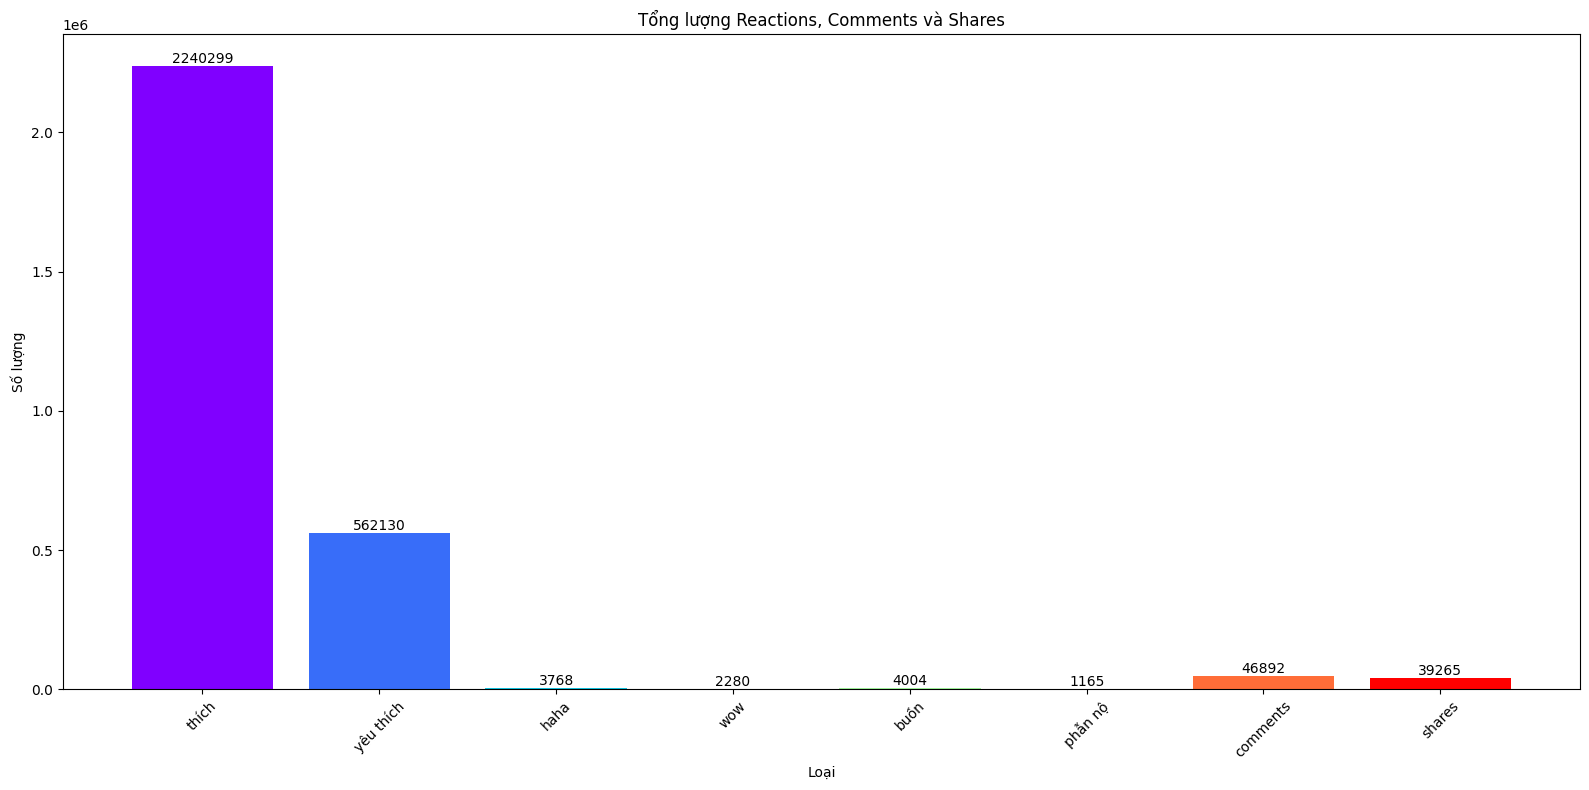

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
reaction_types = ['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ']
total_reactions = {reaction: 0 for reaction in reaction_types}

for index, row in raw_df.iterrows():
    row_reactions = eval(row['reactions'])
    for reaction in reaction_types:
        total_reactions[reaction] += row_reactions.get(reaction, 0)

interact_types = {**total_reactions}
interact_types['comments'] = raw_df['comments'].sum()
interact_types['shares'] = raw_df['shares'].sum()

plt.figure(figsize=(16, 8))
colors = cm.rainbow(np.linspace(0, 1, 8))
bars = plt.bar(interact_types.keys(), interact_types.values(), color=colors)
plt.title('Tổng lượng Reactions, Comments và Shares')
plt.xlabel('Loại')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
for bar, value in zip(bars, interact_types.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(value)), ha='center', va='bottom')
plt.tight_layout()
plt.show()

## Read all posts

In [3]:
df_text = raw_df[['post_id','post_text']]
df_text = df_text[~df_text['post_text'].isna()]
text    = str(df_text['post_text'])



In [4]:
df_text

post_id                                          post_text
0     901339178027581  Back in Premier League action tomorrow 🙌\n\nTr...
1     901360151358817  Stevie G with the sublime 💫 On this day in 2007 🔴
2     901339551360877  Mo on his magical moment against Manchester Ci...
3     901303768031122  Two years ago today... simply STUNNING from Th...
4     900881971406635  On this day in 2019, the resilient Reds found ...
..                ...                                                ...
113   901488261346006                    📸 Ten from Time: Man City (A) 🔴
114   711579010932924  We're LIVE with the boss as he looks ahead to ...
115   901459798015519  The boss is hopeful of having a full squad to ...
116   901418754686290  Mohamed Salah believes his and Liverpool's lev...
117  6825586720887614  We’re LIVE as Jürgen Klopp previews tomorrow’s...

[118 rows x 2 columns]

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127469 (\N{REGIONAL INDICATOR SYMBOL LETTER H}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


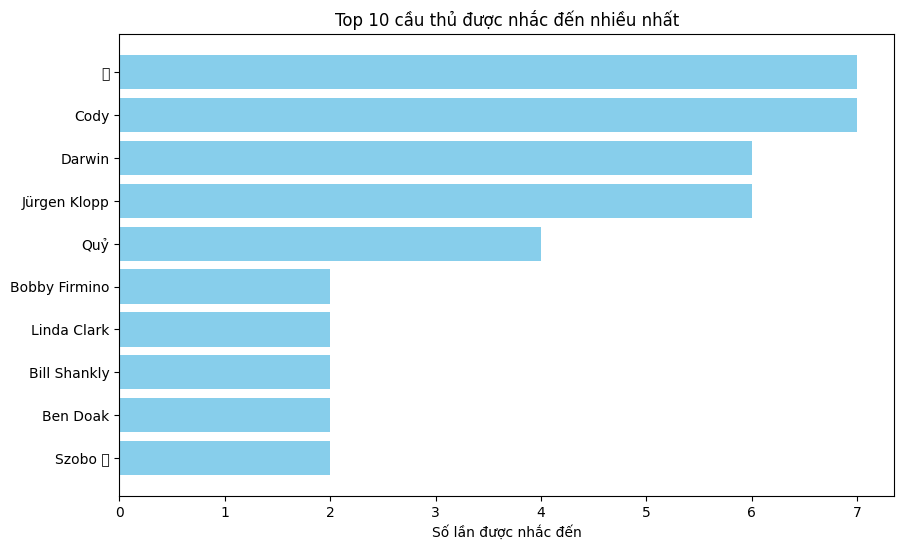

In [6]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter

nlp = spacy.load("en_core_web_sm")

player_mentions = Counter()

for text in df_text['post_text']:
    doc = nlp(text)
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            player_mentions[entity.text] += 1

players = [player[0] for player in player_mentions.most_common()]
mentions = [player[1] for player in player_mentions.most_common()]

plt.figure(figsize=(10, 6))
plt.barh(players[:10], mentions[:10], color='skyblue')
plt.xlabel('Số lần được nhắc đến')
plt.title('Top 10 cầu thủ được nhắc đến nhiều nhất')
plt.gca().invert_yaxis()
plt.show()

Jürgen Klopp: 7 lần
Diogo Jota: 4 lần
Alisson Becker: 2 lần
Adrian: 2 lần
Virgil van Dijk: 1 lần
Mohamed Salah: 1 lần
Kostas Tsimikas: 1 lần
Darwin Nunez: 1 lần
Fabinho: 0 lần
Ibrahima Konate: 0 lần


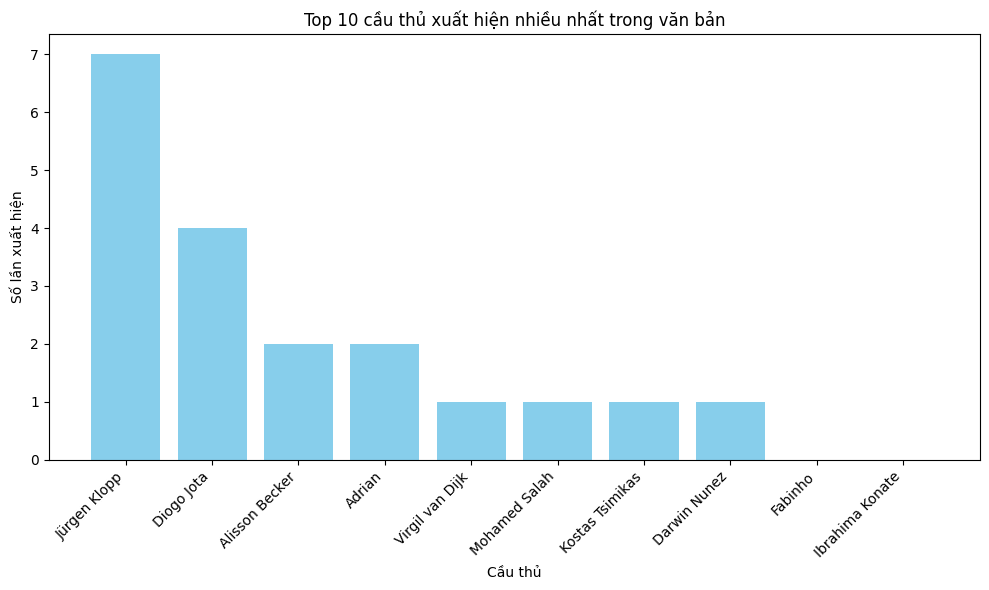

In [16]:
import pandas as pd

liverpool_players = [
    'Alisson Becker', 'Fabinho', 'Virgil van Dijk', 'Ibrahima Konate', 'Thiago Alcantara',
    'James Milner', 'Naby Keita', 'Roberto Firmino', 'Mohamed Salah', 'Joe Gomez', 'Adrian',
    'Jordan Henderson', 'Alex Oxlade-Chamberlain', 'Curtis Jones', 'Diogo Jota', 'Kostas Tsimikas',
    'Luis Diaz', 'Andrew Robertson', 'Darwin Nunez', 'Ben Davies', 'Joel Matip', 'Rhys Williams',
    'Nathaniel Phillips', 'Caoimhín Kelleher', 'Trent Alexander-Arnold', 'Harvey Elliott',
    'Sepp van den Berg', 'Neco Williams', 'Marcelo Pitaluga','Jürgen Klopp'
]
player_counts = {}
for player in liverpool_players:
    count = df_text['post_text'].str.count(player).sum()
    count1 = df_text['post_text'].str.lower().str.count(player.lower()).sum()
    if (count != count1):
      count += count1
    player_counts[player] = count

sorted_players = sorted(player_counts.items(), key=lambda x: x[1], reverse=True)
top_10_players = sorted_players[:10]

for player, count in top_10_players:
    print(f"{player}: {count} lần")
df = pd.DataFrame(top_10_players, columns=['Player', 'Count'])

plt.figure(figsize=(10, 6))
plt.bar(df['Player'], df['Count'], color='skyblue')
plt.xlabel('Cầu thủ')
plt.ylabel('Số lần xuất hiện')
plt.title('Top 10 cầu thủ xuất hiện nhiều nhất trong văn bản')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
import emoji
import regex
def count_emojis(text):
    emojis_list = regex.findall(r'\X', text)
    emoji_count = len([c for c in emojis_list if c in regex.findall(r'\p{Emoji}', c)])
    return emoji_count

def count_emojis_in_dataframe(dataframe):
    dataframe['emoji_count'] = dataframe['post_text'].apply(count_emojis)

    total_emojis = dataframe['emoji_count'].sum()

    return total_emojis, dataframe
total_emojis_count,df_with_emoji_count = count_emojis_in_dataframe(df_text)
print(f"Total emojis found in dataframe: {total_emojis_count}")
print(df_with_emoji_count[['post_id', 'emoji_count']])

Total emojis found in dataframe: 424
              post_id  emoji_count
0     901339178027581            2
1     901360151358817            6
2     901339551360877            5
3     901303768031122            2
4     900881971406635           10
..                ...          ...
113   901488261346006            2
114   711579010932924            0
115   901459798015519            1
116   901418754686290            1
117  6825586720887614            0

[118 rows x 2 columns]


In [ ]:
print("Số bài viết không dùng emoji là:",df_with_emoji_count[df_with_emoji_count['emoji_count']==0]['post_id'].count() )
print(df_with_emoji_count[df_with_emoji_count['emoji_count']==0][['post_id', 'emoji_count']])

Số bài viết không dùng emoji là: 9
              post_id  emoji_count
13    900944961400336            0
37    897574071737425            0
39    897584485069717            0
48    897267648434734            0
50    728808475850542            0
78    895578365270329            0
89    902035197957979            0
114   711579010932924            0
117  6825586720887614            0


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


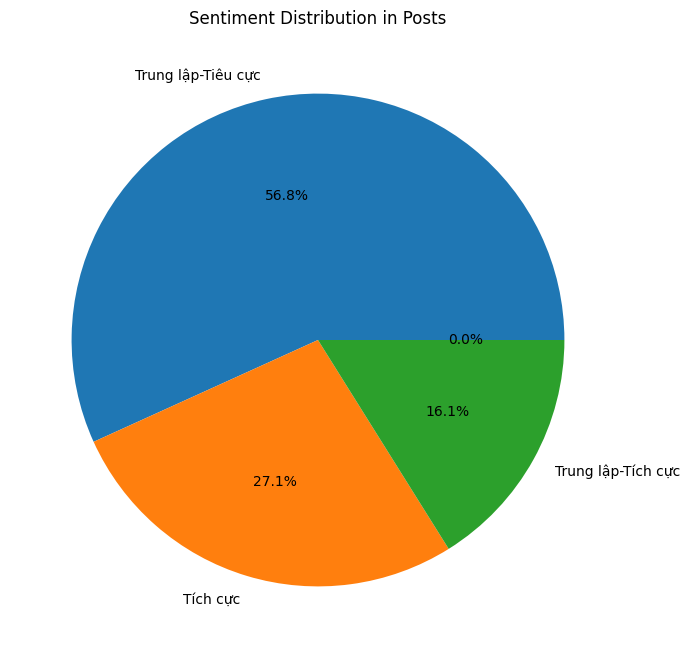

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

df_text['sentiment'] = df_text['post_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

bins = [-1, -0.5, 0, 0.5, 1]
labels = ['Tiêu cực', 'Trung lập-Tiêu cực', 'Trung lập-Tích cực', 'Tích cực']
df_text['sentiment_bins'] = pd.cut(df_text['sentiment'], bins=bins, labels=labels)

plt.figure(figsize=(8, 8))
df_text['sentiment_bins'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Distribution in Posts')
plt.ylabel('')
plt.show()

In [ ]:
df_text

post_id                                          post_text  \
0     901339178027581  Back in Premier League action tomorrow 🙌\n\nTr...   
1     901360151358817  Stevie G with the sublime 💫 On this day in 2007 🔴   
2     901339551360877  Mo on his magical moment against Manchester Ci...   
3     901303768031122  Two years ago today... simply STUNNING from Th...   
4     900881971406635  On this day in 2019, the resilient Reds found ...   
..                ...                                                ...   
113   901488261346006                    📸 Ten from Time: Man City (A) 🔴   
114   711579010932924  We're LIVE with the boss as he looks ahead to ...   
115   901459798015519  The boss is hopeful of having a full squad to ...   
116   901418754686290  Mohamed Salah believes his and Liverpool's lev...   
117  6825586720887614  We’re LIVE as Jürgen Klopp previews tomorrow’s...   

     emoji_count  sentiment sentiment_bins  
0              2     0.0000      Trung lập  
1              6     0.0000      Trung lập  
2              5     0.0000      Trung lập  
3              2     0.5160      Hạnh phúc  
4             10     0.7717      Hạnh phúc  
..           ...        ...            ...  
113            2     0.0000      Trung lập  
114            0     0.0000      Trung lập  
115            1     0.5106      Hạnh phúc  
116            1     0.0000      Trung lập  
117            0     0.0000      Trung lập  

[118 rows x 5 columns]

In [ ]:
from transformers import pipeline
import pandas as pd

classifier = pipeline('sentiment-analysis')
sentiments = []
for index, row in df_text.iterrows():
    post_text = row['post_text']
    emotion = classifier(post_text)[0]['label']
    sentiments.append(emotion)

df_text['sentiment'] = sentiments

print(df_text)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

              post_id                                          post_text  \
0     901339178027581  Back in Premier League action tomorrow 🙌\n\nTr...   
1     901360151358817  Stevie G with the sublime 💫 On this day in 2007 🔴   
2     901339551360877  Mo on his magical moment against Manchester Ci...   
3     901303768031122  Two years ago today... simply STUNNING from Th...   
4     900881971406635  On this day in 2019, the resilient Reds found ...   
..                ...                                                ...   
113   901488261346006                    📸 Ten from Time: Man City (A) 🔴   
114   711579010932924  We're LIVE with the boss as he looks ahead to ...   
115   901459798015519  The boss is hopeful of having a full squad to ...   
116   901418754686290  Mohamed Salah believes his and Liverpool's lev...   
117  6825586720887614  We’re LIVE as Jürgen Klopp previews tomorrow’s...   

    sentiment      sentiment_bins  
0    POSITIVE  Trung lập-Tiêu cực  
1    POSITIVE  

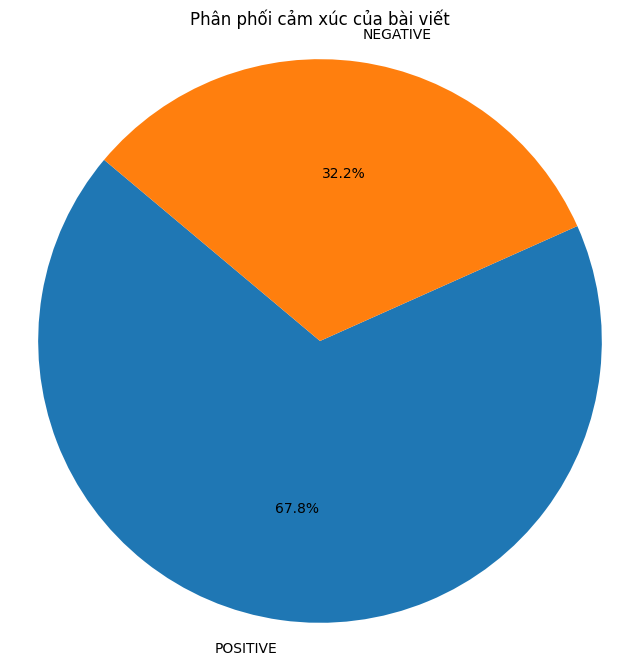

In [ ]:
sentiment_counts = df_text['sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Phân phối cảm xúc của bài viết')
plt.show()

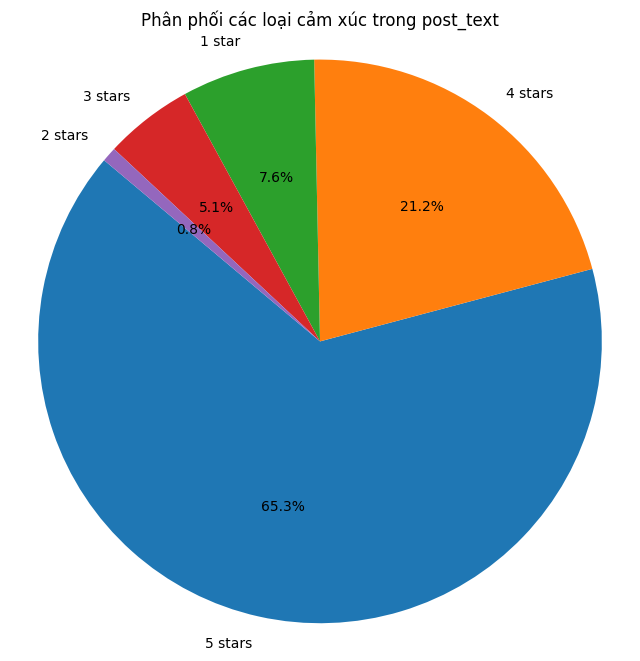

In [ ]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

sentiments = []
for text in df_text['post_text']:
    sentiment_result = sentiment_analysis(text)
    sentiments.append(sentiment_result[0]['label'])

sentiments_df = pd.DataFrame(sentiments, columns=['Sentiment'])

sentiment_counts = sentiments_df['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối các loại cảm xúc trong post_text')
plt.axis('equal')
plt.show()

In [ ]:
df_text['Sentiment'] = sentiments

negative_posts = df_text[(df_text['Sentiment'] == '1 star') ]

print("Các bài viết có tính tiêu cực:")
print(negative_posts['post_id'])

Các bài viết có tính tiêu cực:
22     898475791647253
36     897420878419411
43     896863308475168
68     896117815216384
84     902088164619349
89     902035197957979
92     902001447961354
108    901491428012356
111    901542568007242
Name: post_id, dtype: int64


In [ ]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

comments_list = df['comment_text'].tolist()

sentiments = []
for comment in comments_list:
    sentiment_result = sentiment_analysis(comment)
    sentiments.append(sentiment_result[0]['label'])

sentiments_df = pd.DataFrame(sentiments, columns=['Sentiment'])

sentiment_counts = sentiments_df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Loại Cảm xúc')
plt.ylabel('Số lượng')
plt.title('Số lượng các loại cảm xúc trong comments')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

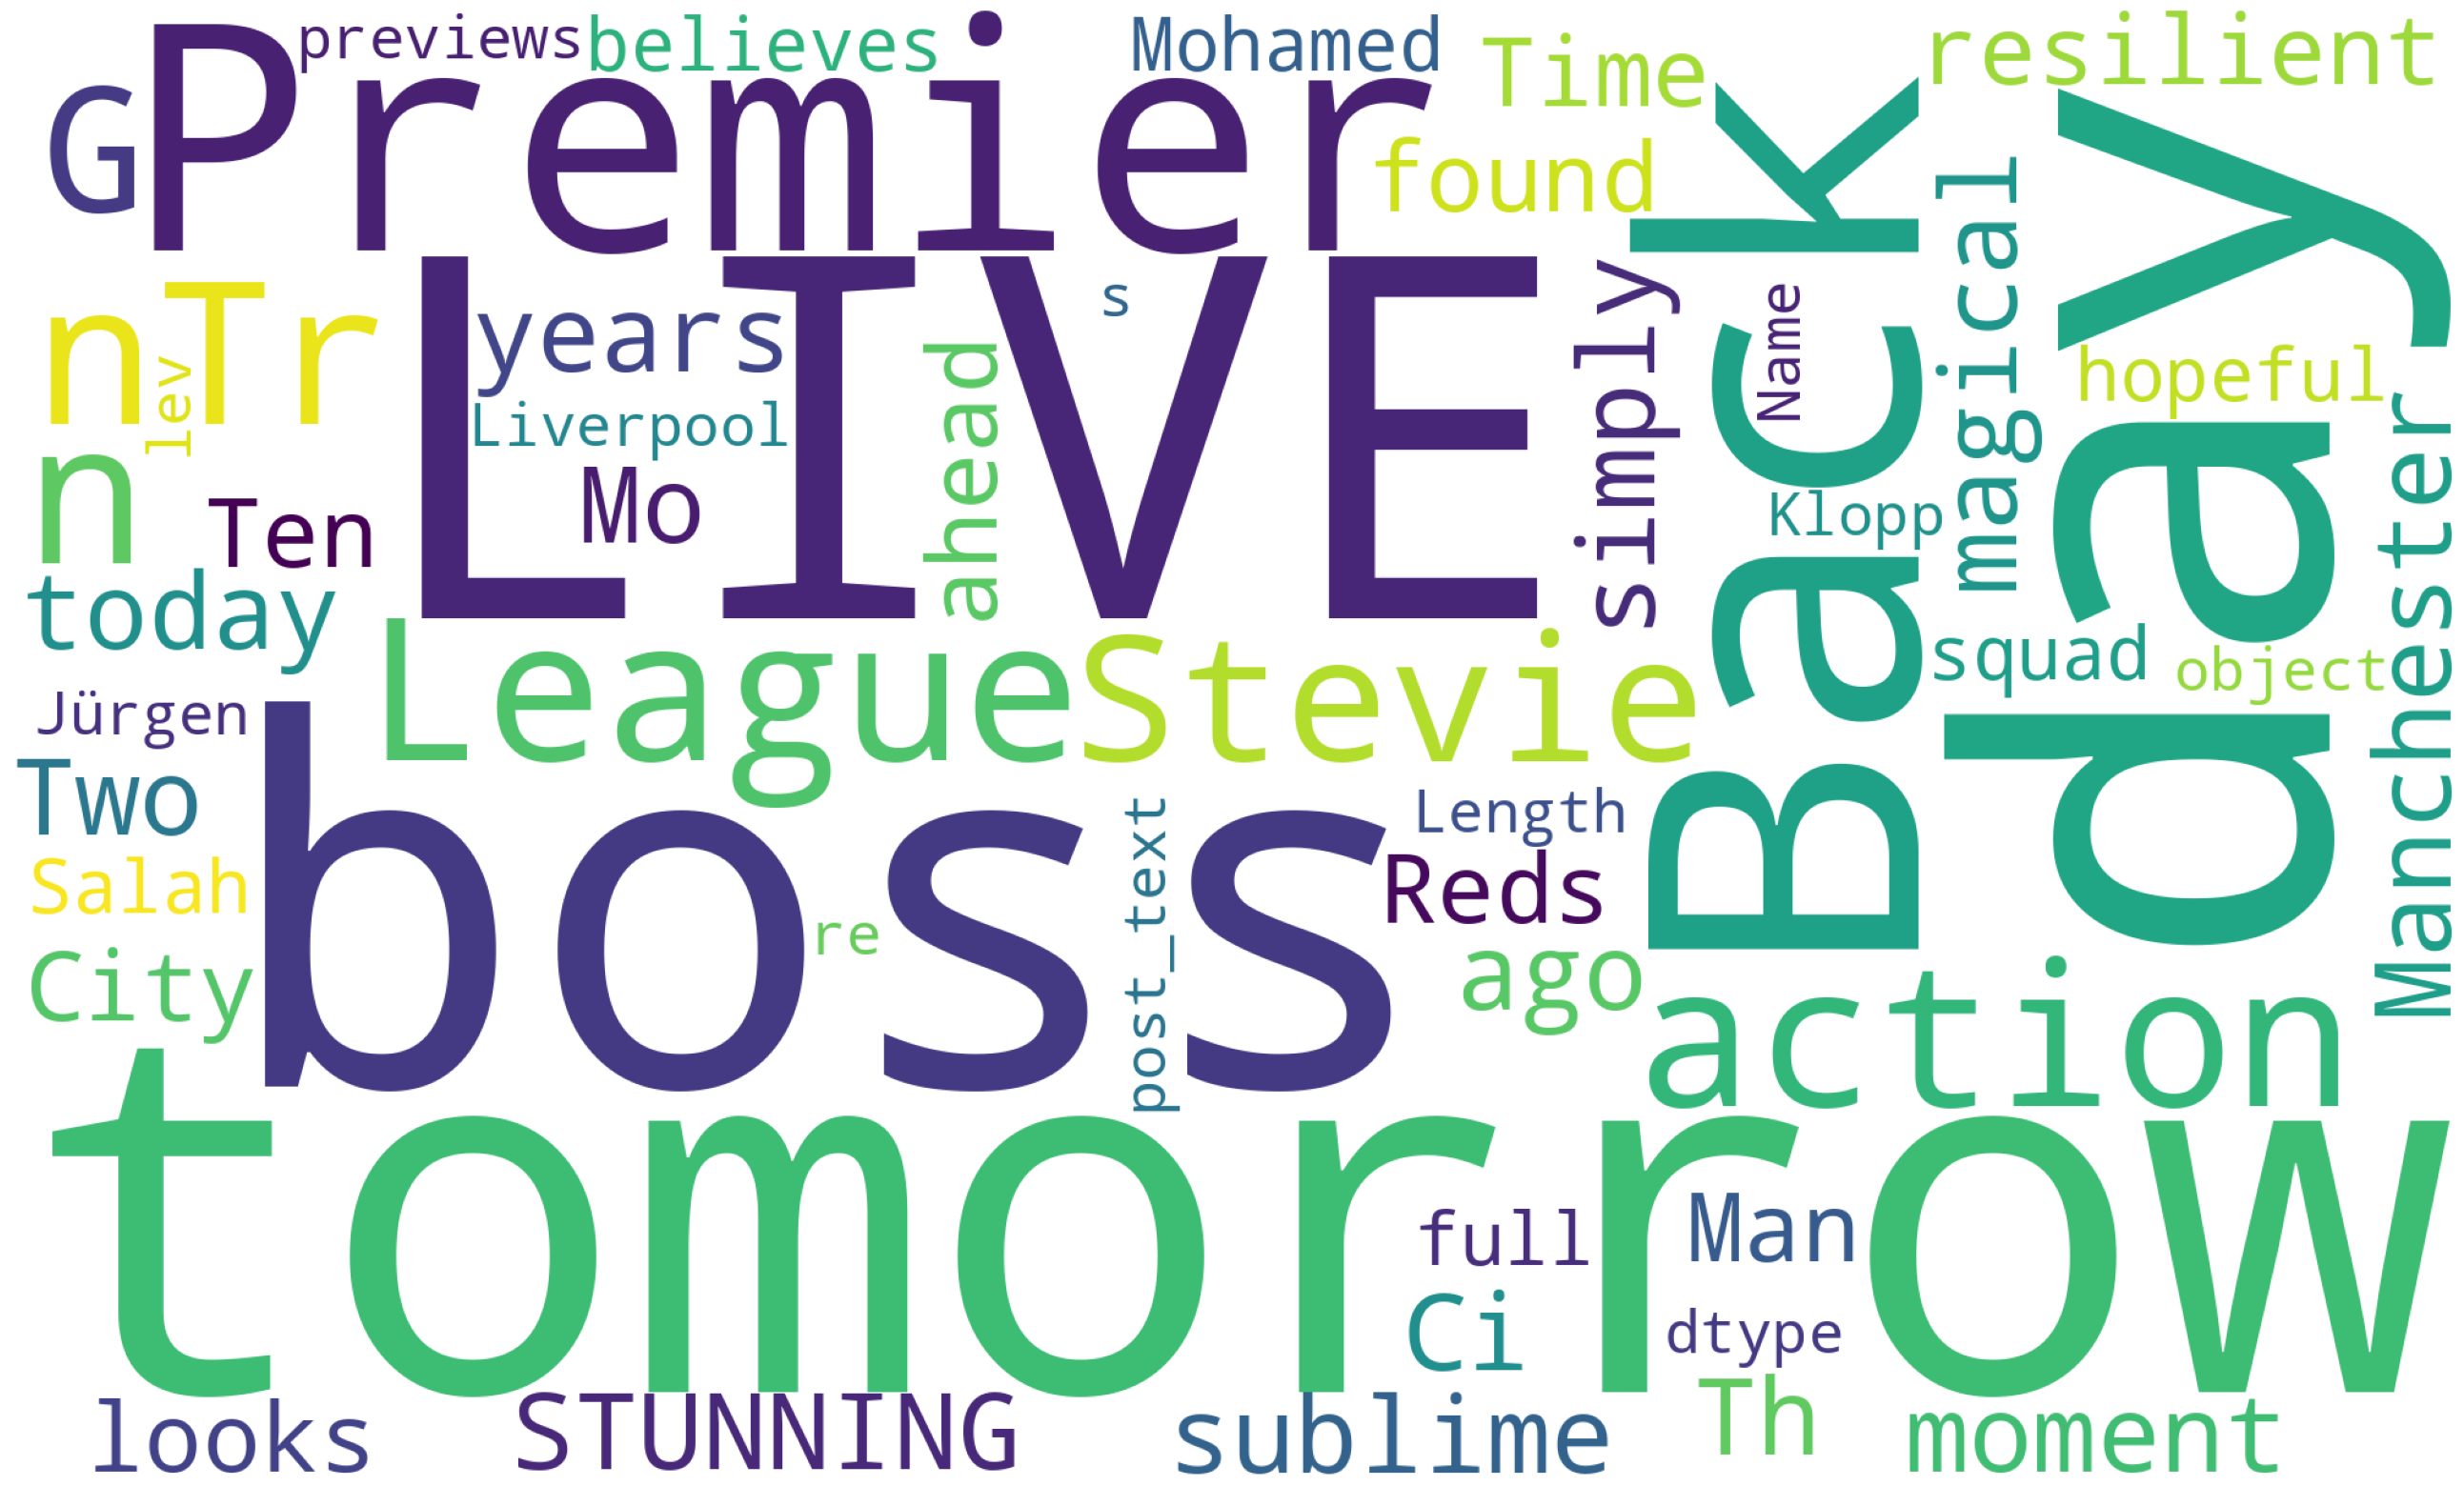

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
raw_df['time'] = pd.to_datetime(raw_df['time'])
week_day = ['Thứ Hai', 'Thứ Ba', 'Thứ Tư', 'Thứ Năm', 'Thứ Sáu', 'Thứ Bảy', 'Chủ Nhật']
raw_df['week_day'] = raw_df['time'].apply(lambda x: week_day[x.weekday()])
post_by_weekday = raw_df['week_day'].value_counts().reindex(['Thứ Hai', 'Thứ Ba', 'Thứ Tư', 'Thứ Năm', 'Thứ Sáu', 'Thứ Bảy', 'Chủ Nhật'])
reactions_by_weekday = raw_df.groupby('week_day')['reaction_count'].sum().reindex(['Thứ Hai', 'Thứ Ba', 'Thứ Tư', 'Thứ Năm', 'Thứ Sáu', 'Thứ Bảy', 'Chủ Nhật'])
comments_by_weekday = raw_df.groupby('week_day')['comments'].sum().reindex(['Thứ Hai', 'Thứ Ba', 'Thứ Tư', 'Thứ Năm', 'Thứ Sáu', 'Thứ Bảy', 'Chủ Nhật'])
shares_by_weekday = raw_df.groupby('week_day')['shares'].sum().reindex(['Thứ Hai', 'Thứ Ba', 'Thứ Tư', 'Thứ Năm', 'Thứ Sáu', 'Thứ Bảy', 'Chủ Nhật'])

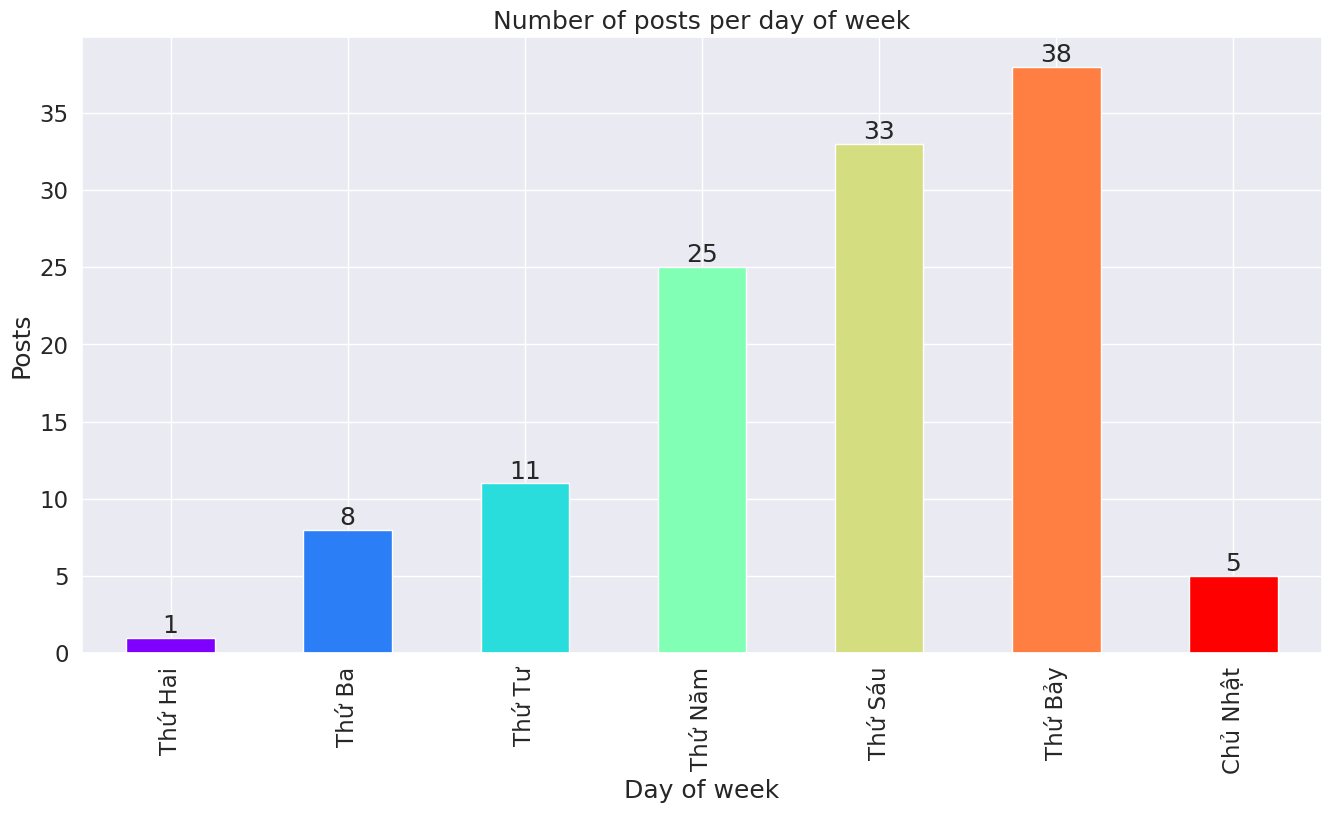

In [ ]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, len(raw_df['week_day'].unique())))
bars = post_by_weekday.plot(kind='bar', figsize=(16,8), color=colors)
plt.title('Number of posts per day of week')
plt.xlabel('Day of week')
plt.ylabel('Posts')
for bar, value in zip(bars.patches, post_by_weekday.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(value)), ha='center', va='bottom')

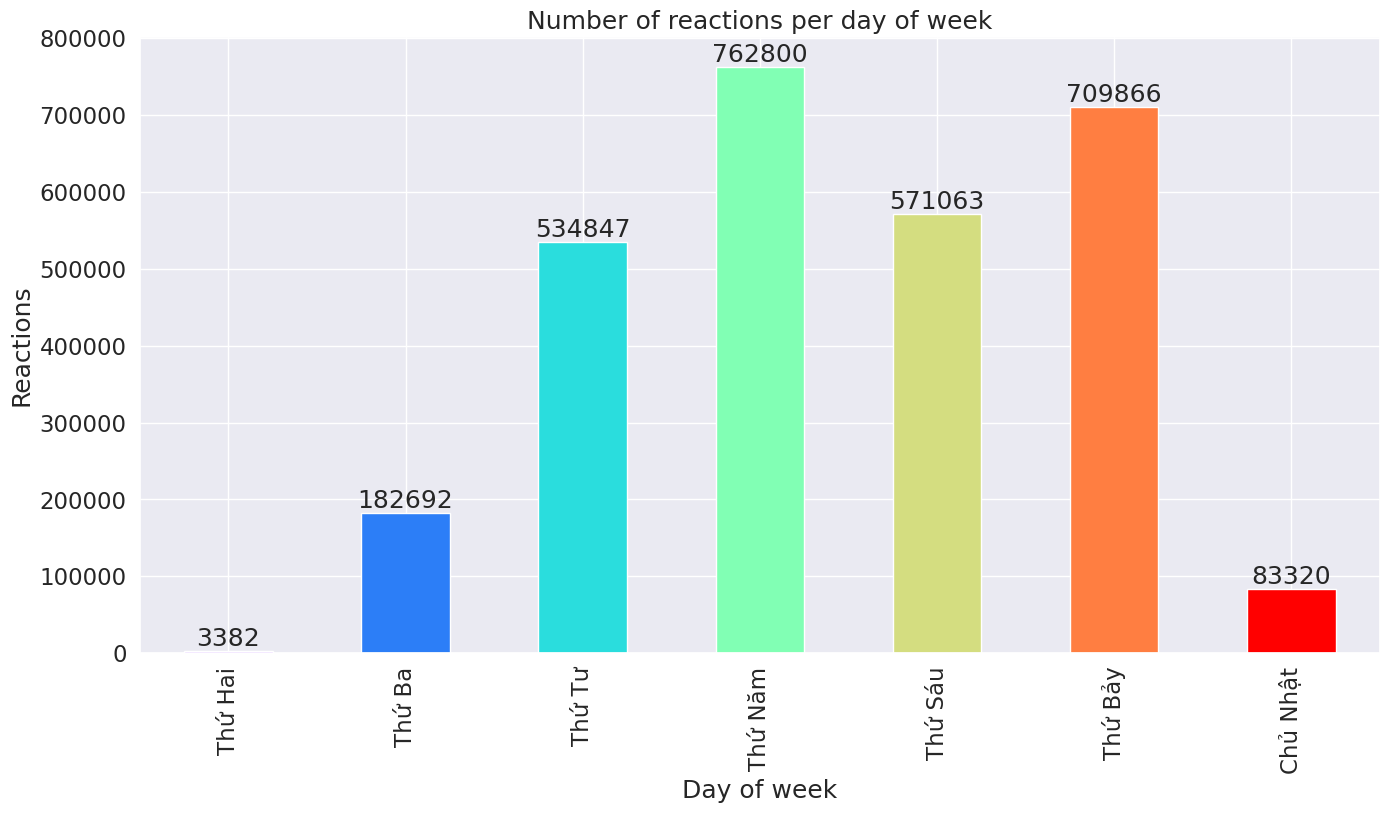

In [ ]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, len(raw_df['week_day'].unique())))
bars = reactions_by_weekday.plot(kind='bar', figsize=(16,8), color=colors)
plt.title('Number of reactions per day of week')
plt.xlabel('Day of week')
plt.ylabel('Reactions')
for bar, value in zip(bars.patches, reactions_by_weekday.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(value)), ha='center', va='bottom')

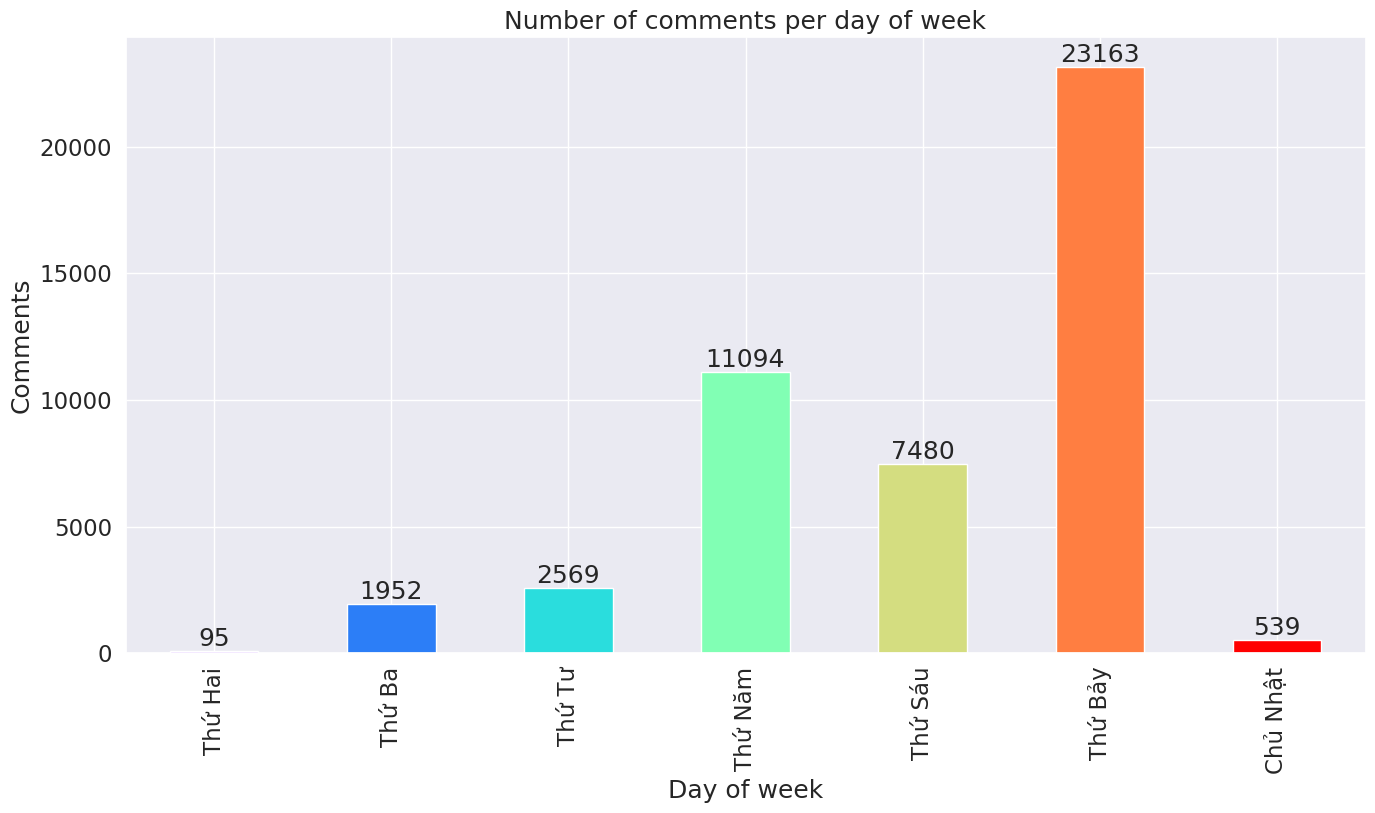

In [ ]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, len(raw_df['week_day'].unique())))
bars = comments_by_weekday.plot(kind='bar', figsize=(16,8), color=colors)
plt.title('Number of comments per day of week')
plt.xlabel('Day of week')
plt.ylabel('Comments')
for bar, value in zip(bars.patches, comments_by_weekday.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(value)), ha='center', va='bottom')

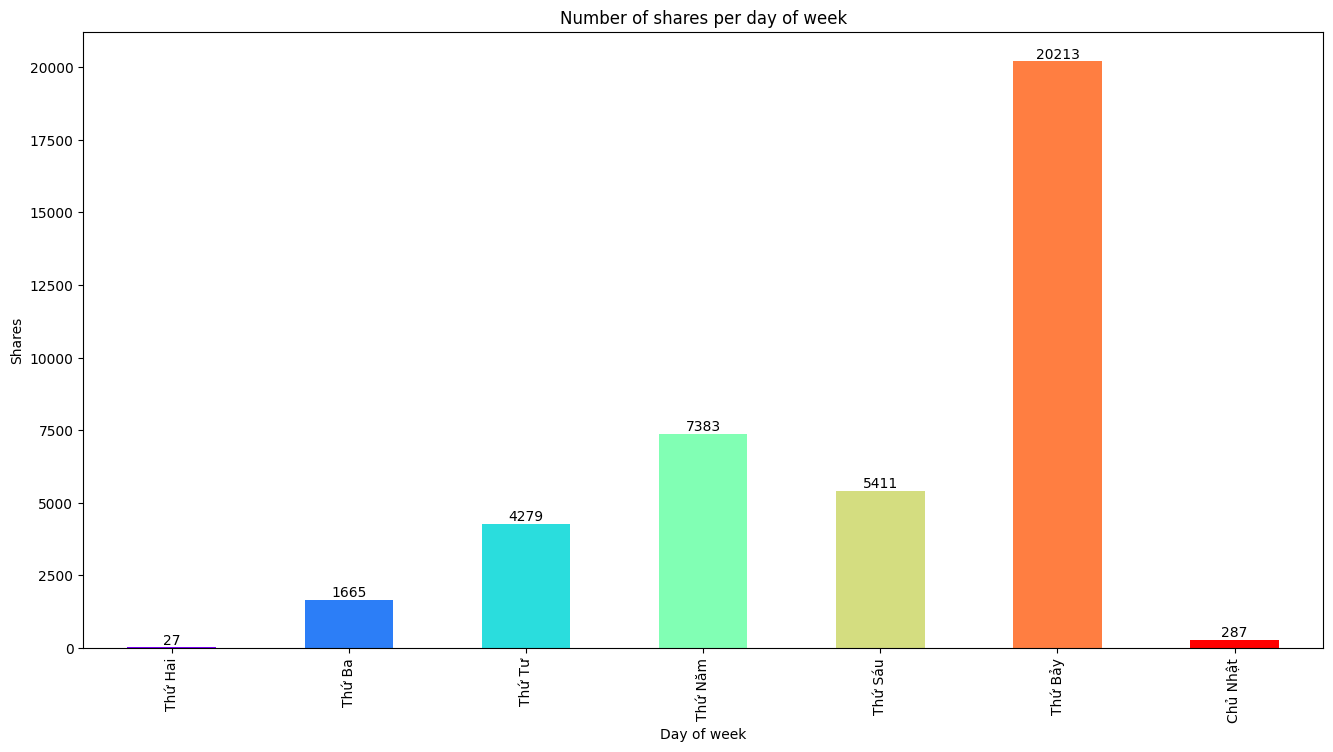

In [ ]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, len(raw_df['week_day'].unique())))
bars = shares_by_weekday.plot(kind='bar', figsize=(16,8), color=colors)
plt.title('Number of shares per day of week')
plt.xlabel('Day of week')
plt.ylabel('Shares')
for bar, value in zip(bars.patches, shares_by_weekday.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(value)), ha='center', va='bottom')

In [ ]:
import pandas as pd

raw_df['time'] = pd.to_datetime(raw_df['time'])


raw_df['hour'] = raw_df['time'].dt.hour


posts_by_hour = raw_df.groupby('hour').size().rename('posts_count')

interactions_by_hour = raw_df.groupby('hour')[['reaction_count', 'comments', 'shares']].sum()

result_by_hour = pd.concat([posts_by_hour, interactions_by_hour], axis=1)

print(result_by_hour)

      posts_count  reaction_count  comments   shares
hour                                                
0               2         31824.0     473.0    137.0
6               1         11199.0     371.0    115.0
8               7        117022.0    2682.0   2856.0
9               8        293256.0    5217.0   3602.0
10              9        118230.0    1914.0   1114.0
11             15        214598.0    7064.0   6137.0
12             15        168264.0    2670.0   2060.0
13              8        215654.0    6584.0   2339.0
14             12        296081.0    7230.0  10537.0
15             15        267313.0    2642.0   1961.0
16              6        220120.0    2271.0   1232.0
17              4         96120.0     954.0    722.0
18              8        649361.0    5400.0   4991.0
19              4         82913.0     780.0    704.0
20              1          4612.0      55.0     76.0
21              5         43830.0     412.0    605.0
23              1         17573.0     173.0   

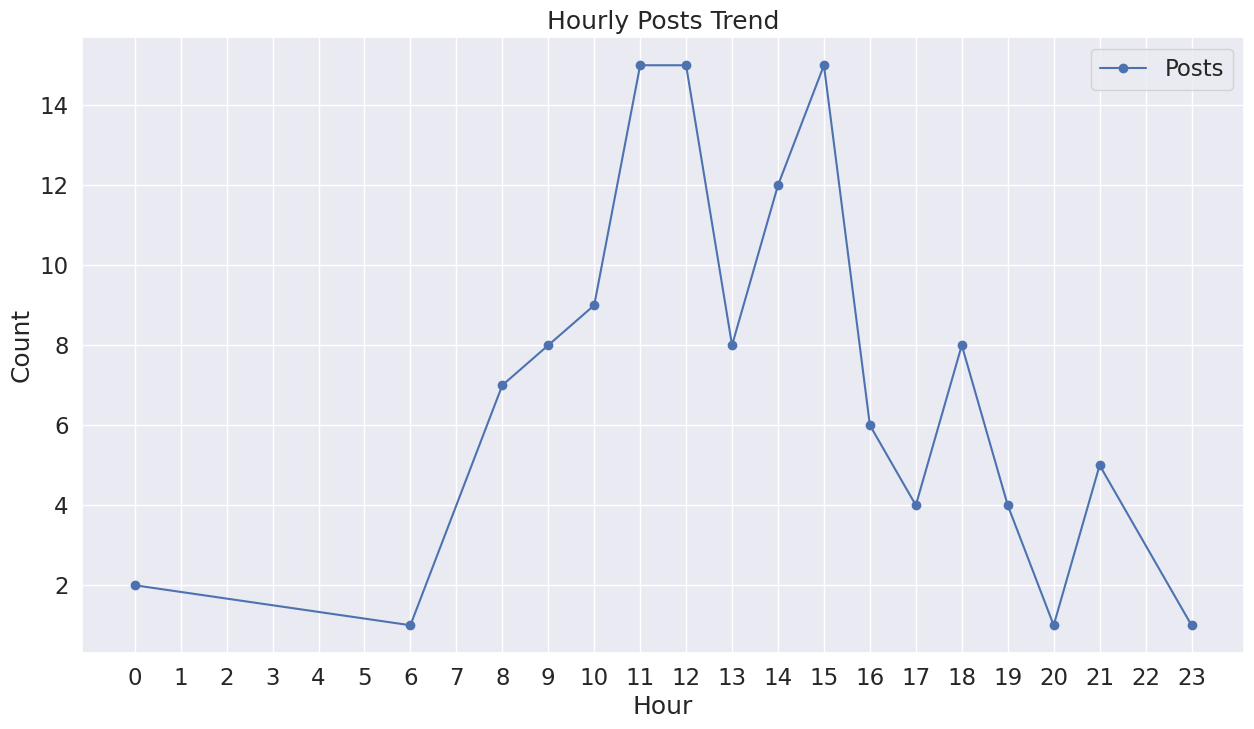

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

plt.plot(result_by_hour.index, result_by_hour['posts_count'], marker='o', label='Posts')
plt.title('Hourly Posts Trend')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(range(24))
plt.show()

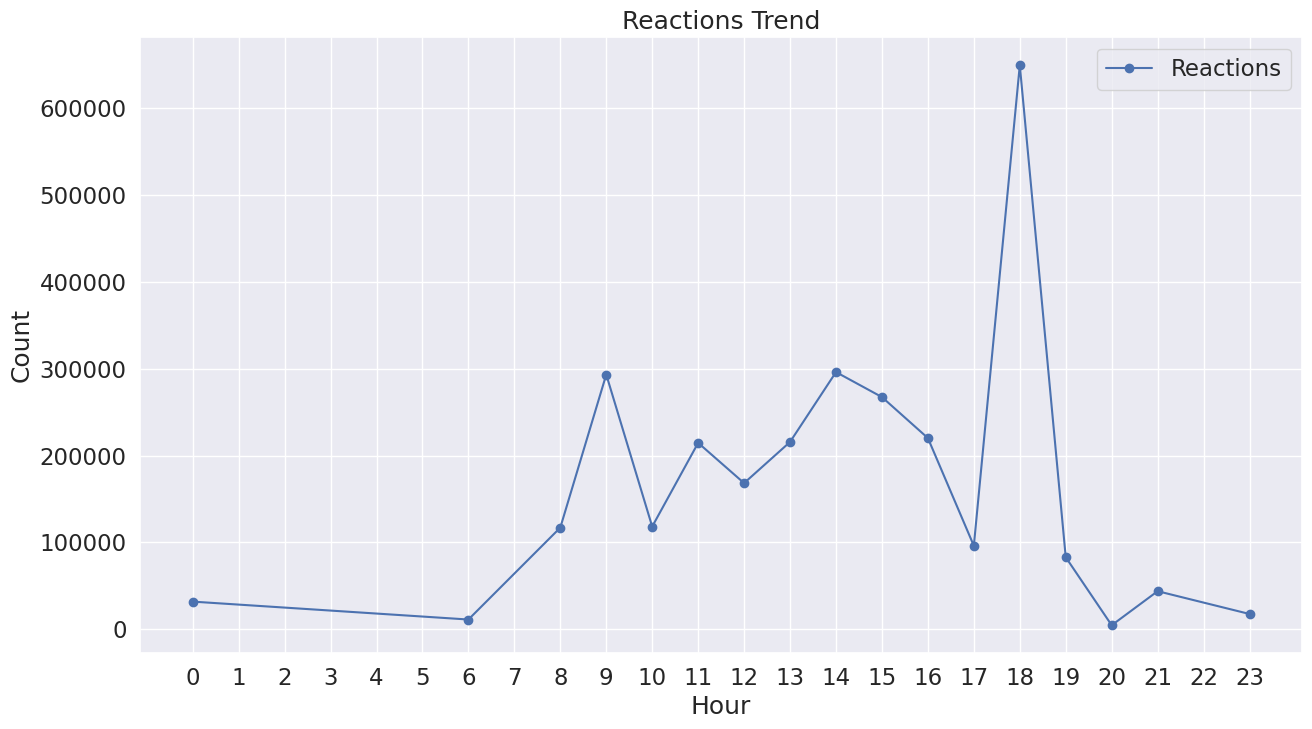

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(result_by_hour.index, result_by_hour['reaction_count'], marker='o', label='Reactions')
plt.title('Reactions Trend')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(range(24))
plt.show()

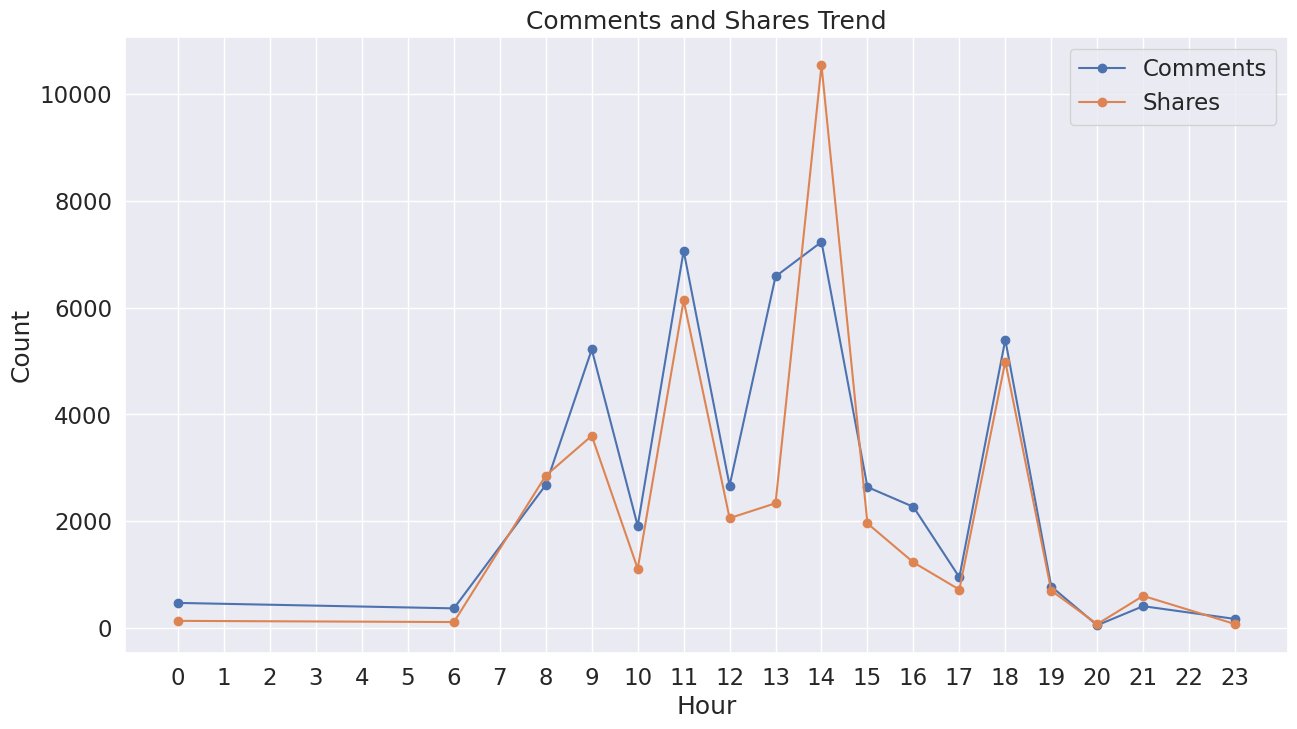

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(result_by_hour.index, result_by_hour['comments'], marker='o', label='Comments')
plt.plot(result_by_hour.index, result_by_hour['shares'], marker='o', label='Shares')

plt.title('Comments and Shares Trend')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(range(24))
plt.show()

In [ ]:
reactors_count = raw_df[raw_df['reactors'] != '[]']['reactors'].value_counts()
most_active_user = reactors_count.idxmax()

print(f"Người tương nhiều nhất với trang nhất: {most_active_user}")

Người tương nhiều nhất với trang nhất: [{'name': 'Idze Pro', 'link': 'https://facebook.com/profile.php?id=100095762190420&eav=AfYd2nUuXVT4Y52cs08i909K2gBr3rck7IqT5po6oj8LC_LC0s4zPfc8k5Ry1JmEOQg&fref=pb&paipv=0', 'type': 'like'}, {'name': 'Win Hlaing', 'link': 'https://facebook.com/profile.php?id=100095604661759&eav=AfblhPPpI2IzJpm5Ytnt4y46bEF_fDZ4X31A42ere89L_OJHRAuZvsOlsk1nYNCdH3I&fref=pb&paipv=0', 'type': 'like'}, {'name': 'Sihaamita Axmed', 'link': 'https://facebook.com/profile.php?id=100095558555623&eav=AfaE--D6aBOlXRIYZs7TRoeFICYxk9Jm3-5sXrz036fXyDu8Ur-Fb3CW4XETmsyed7w&fref=pb&paipv=0', 'type': 'like'}, {'name': 'Ibrahim Shehu Sani', 'link': 'https://facebook.com/profile.php?id=100095526664396&eav=Afbtc8uoL7yWKjwK2_dQ4OQUQu2oH4aQKjEl52vCf3ev0tPScWz8uCanuXmNuwWw4gs&fref=pb&paipv=0', 'type': 'like'}, {'name': 'Abdul Basit', 'link': 'https://facebook.com/profile.php?id=100095409305615&eav=Afb5DSmkFTo53Ip-XSsaVtW8Q0sNYNKNAIP62MkY397maGEsQv9uANG4QLK5uFB89jw&fref=pb&paipv=0', 'type': 'l

In [3]:
comments_df = pd.read_csv("/content/drive/MyDrive/pythoncomments.csv")

In [18]:
comments_df

comment_id                            comment_url  \
0       166589636539881   https://facebook.com/166589636539881   
1       316405624518125   https://facebook.com/316405624518125   
2      1535349470636263  https://facebook.com/1535349470636263   
3       334473716008392   https://facebook.com/334473716008392   
4       345785601471026   https://facebook.com/345785601471026   
...                 ...                                    ...   
13065  3464579610537246  https://facebook.com/3464579610537246   
13066  1288355058431142  https://facebook.com/1288355058431142   
13067  6431555500199122  https://facebook.com/6431555500199122   
13068  1467293210684586  https://facebook.com/1467293210684586   
13069  1319846145633549  https://facebook.com/1319846145633549   

          commenter_id                                      commenter_url  \
0      100011287952770  https://facebook.com/chibwe.john.750?eav=AfY-V...   
1      100090261290780  https://facebook.com/profile.php?id=1000902612...   
2      100073275163318  https://facebook.com/salam.ngola.1?eav=Afb2DGj...   
3      100005905954896  https://facebook.com/maximo.lutamfya?eav=Afb9M...   
4      100014861324909  https://facebook.com/kasibante.paul.585?eav=Af...   
...                ...                                                ...   
13065  100092670196821  https://facebook.com/profile.php?id=1000926701...   
13066  100087052131647  https://facebook.com/profile.php?id=1000870521...   
13067  100034574264687  https://facebook.com/mdrubelhossain.rubel.1004...   
13068  100013935343511  https://facebook.com/cloudlubona.sichimvula?ea...   
13069  100018679239640  https://facebook.com/adamuibrahimwadakafinsoki...   

                 commenter_name  \
0            John Chibwe Junior   
1                Shukrow Hillow   
2                   Salam Ngola   
3          Maximillian Lutamfya   
4                Kasibante Paul   
...                         ...   
13065  Alexis Mac Allister News   
13066         Mohammed Abdullah   
13067       Rubel Hossain Ruhul   
13068           Cloud Sichivula   
13069           Abubakar Yahaya   

                                            comment_text         comment_time  \
0      Good luck team..... I know it's not easy beati...                  NaN   
1                                         Good luck lads                  NaN   
2              Go make us proud, in Liverpool I trust ✊💪                  NaN   
3      Let’s show them we reds straight win though to...                  NaN   
4              Good luck pool! You will never Walk alone                  NaN   
...                                                  ...                  ...   
13065                     Let's go guys\nFollow up ❤❤❤❤❤  2023-05-25 00:00:00   
13066                                               Nice  2023-05-25 00:00:00   
13067                                              Vamus  2023-05-25 00:00:00   
13068                                 Best move Allister  2023-05-25 00:00:00   
13069  Nothing is hopeless; we must hope for everythi...  2023-05-25 00:00:00   

                                           comment_image  \
0      https://scontent-lga3-2.xx.fbcdn.net/m1/v/t6/A...   
1      https://scontent-lga3-2.xx.fbcdn.net/m1/v/t6/A...   
2      https://scontent-lga3-2.xx.fbcdn.net/m1/v/t6/A...   
3      https://scontent-lga3-2.xx.fbcdn.net/m1/v/t6/A...   
4      https://scontent-lga3-2.xx.fbcdn.net/m1/v/t6/A...   
...                                                  ...   
13065                                                NaN   
13066                                                NaN   
13067                                                NaN   
13068                                                NaN   
13069                                                NaN   

                                        comment_reactors  \
0      [{'name': 'David Omemgboji', 'link': 'https://...   
1      [{'name': 'Shukrow Hillow', 'link': 'https://f...   


In [23]:
cmt_text = comments_df[['comment_id','comment_text']]
cmt_text = cmt_text[~cmt_text['comment_text'].isna()]
text    = str(cmt_text['comment_text'])

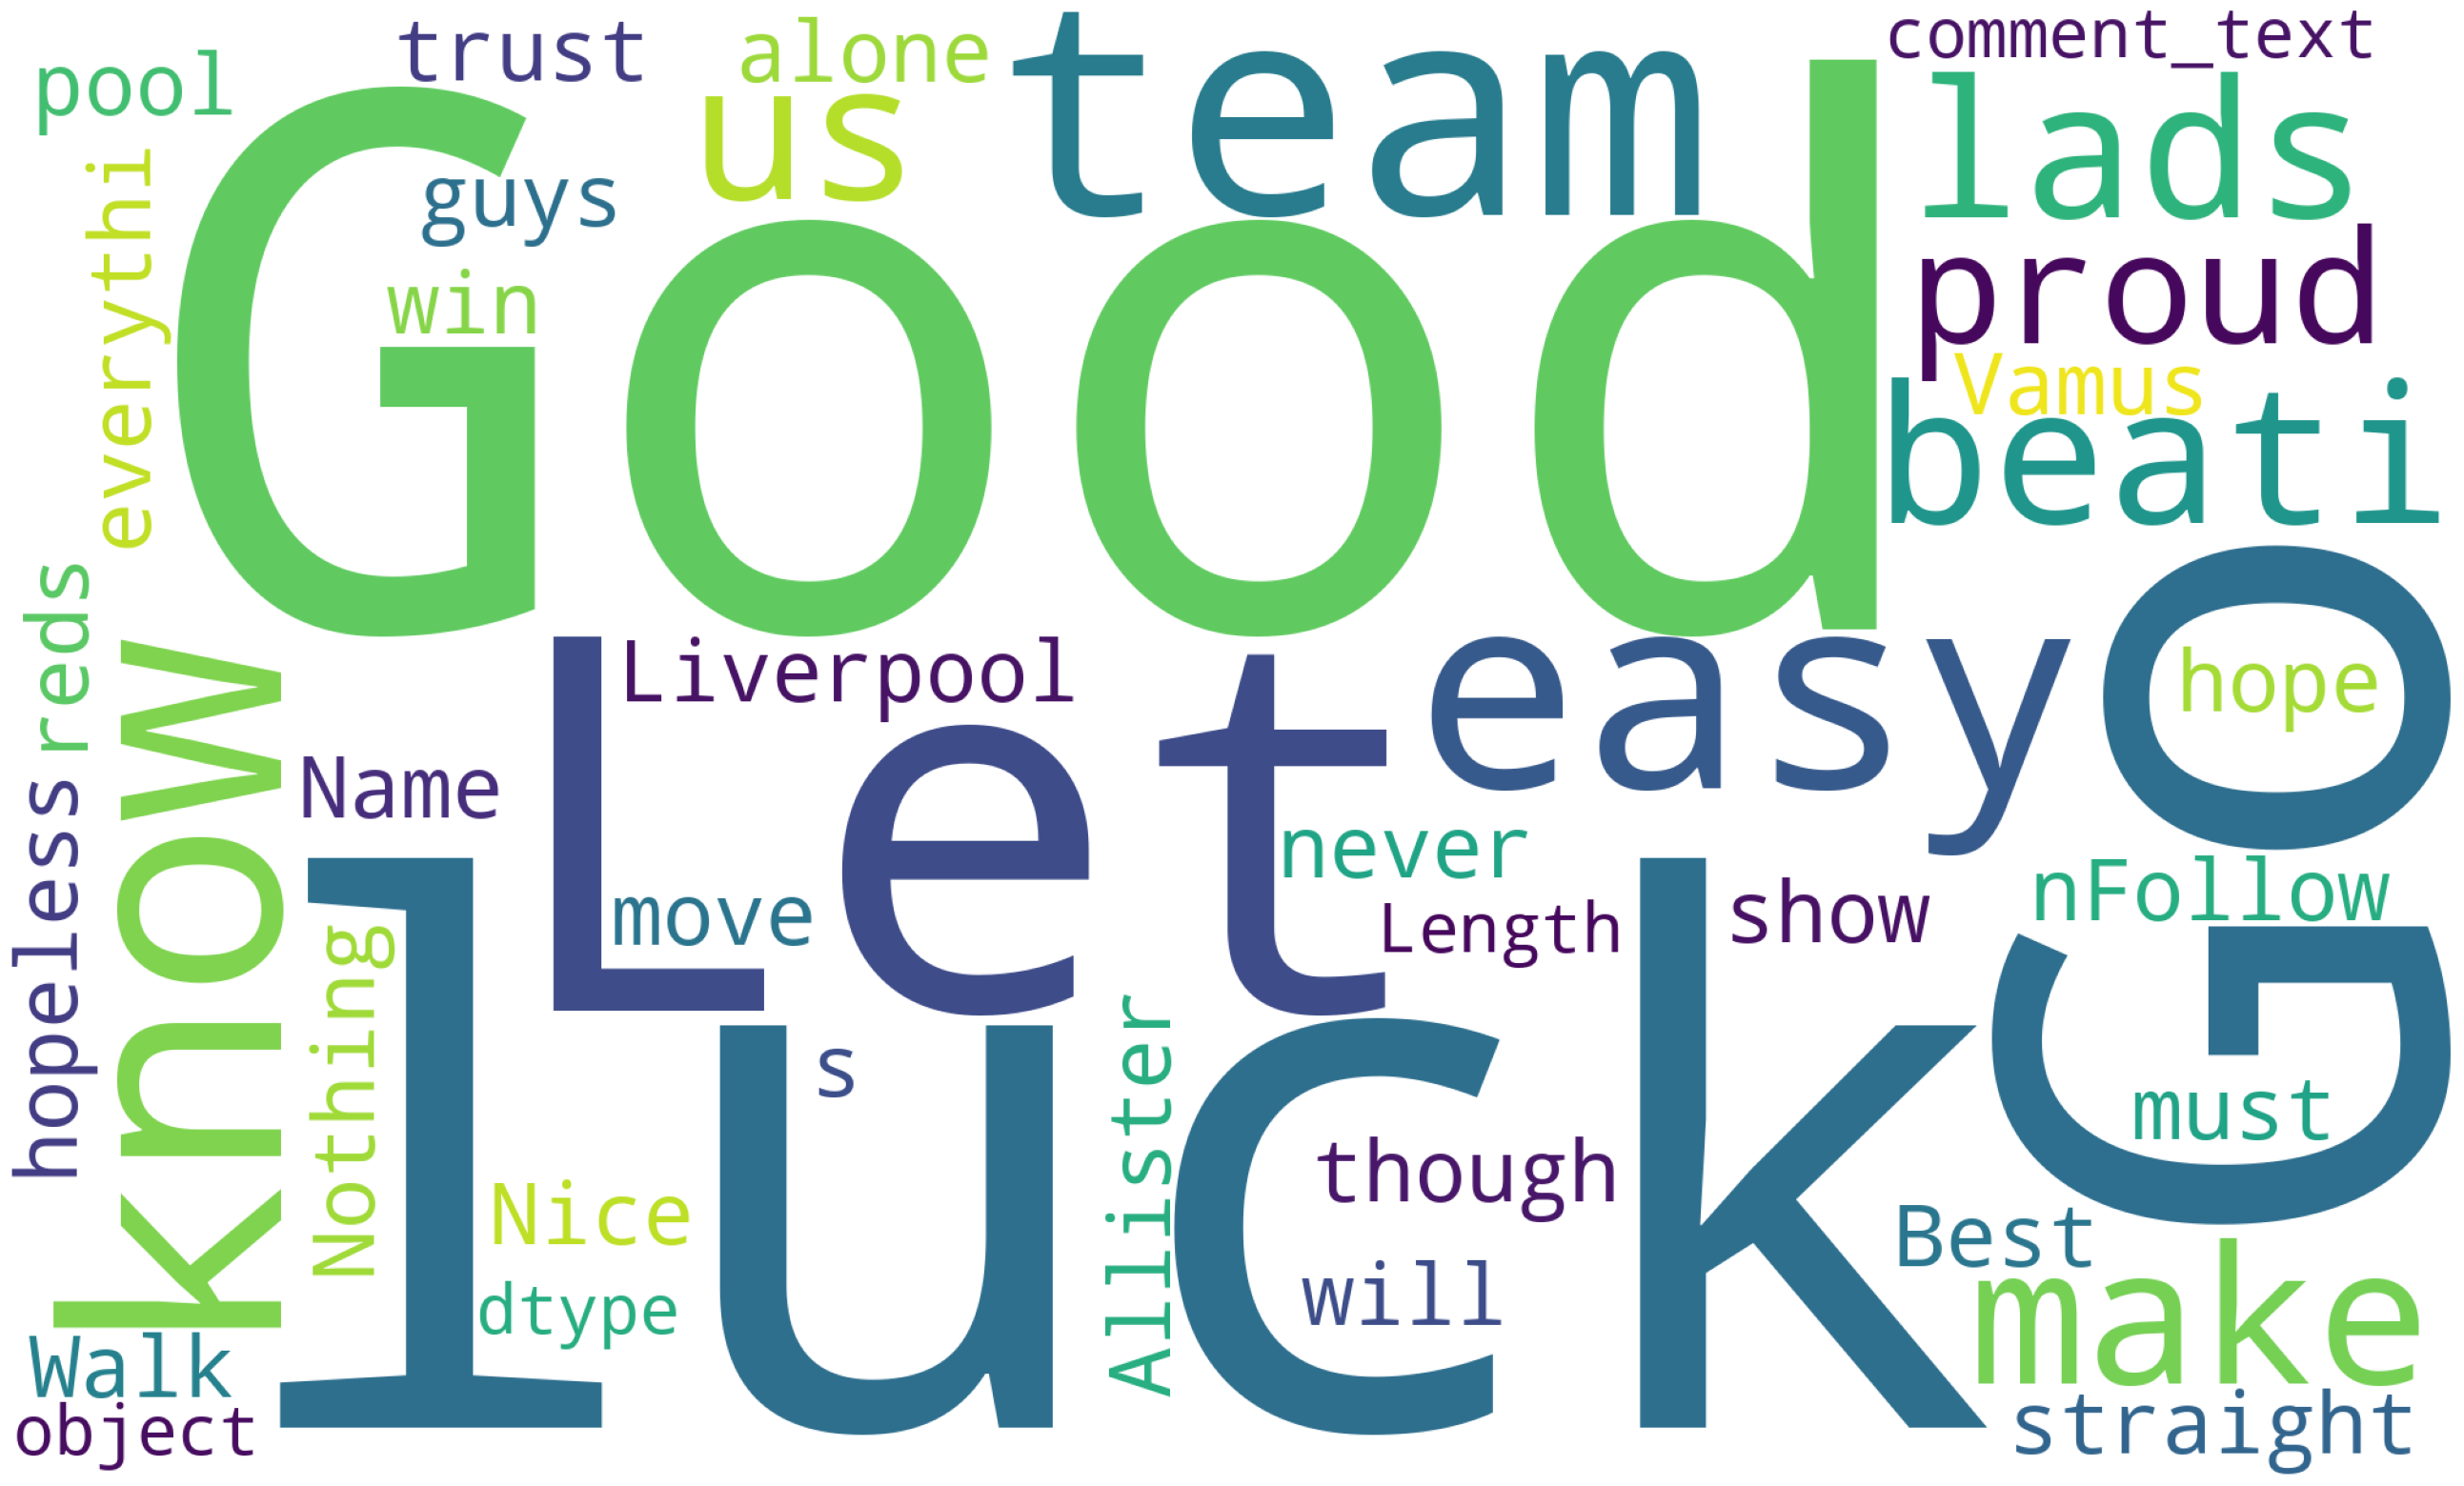

In [24]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129657 (\N{ADHESIVE BANDAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


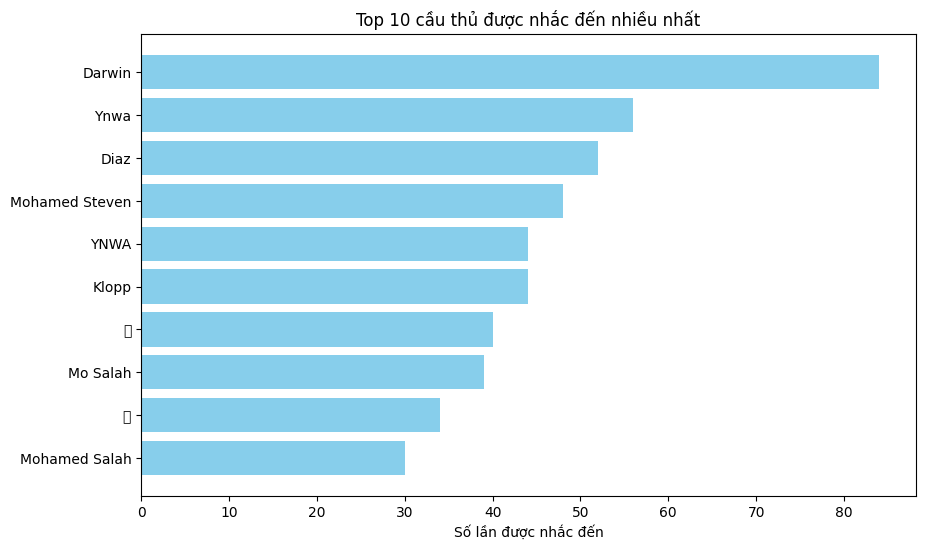

In [25]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter

nlp = spacy.load("en_core_web_sm")

player_mentions = Counter()

for text in cmt_text['comment_text']:
    doc = nlp(text)
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            player_mentions[entity.text] += 1

players = [player[0] for player in player_mentions.most_common()]
mentions = [player[1] for player in player_mentions.most_common()]

plt.figure(figsize=(10, 6))
plt.barh(players[:10], mentions[:10], color='skyblue')
plt.xlabel('Số lần được nhắc đến')
plt.title('Top 10 cầu thủ được nhắc đến nhiều nhất')
plt.gca().invert_yaxis()
plt.show()

Top 10 người comment nhiều nhất:
       commenter_id       commenter_name  comment_count
1    61550006841608          Young Draco             84
2   100069263154344       Mohamed Steven             82
3   100003331242053           Juan David             82
4   100002779022852          Swanky Kata             74
5   100014939322320  Mohamed Sahr Kendor             70
6   100078650171798       Mohamed Steven             47
7   100073428073958               DE Cat             32
8   100048563692275       Māzì Bïģğå Ğēé             30
9   100094141431539          Young Draco             27
10  100068364873186    Yoel Yankiel Peña             26



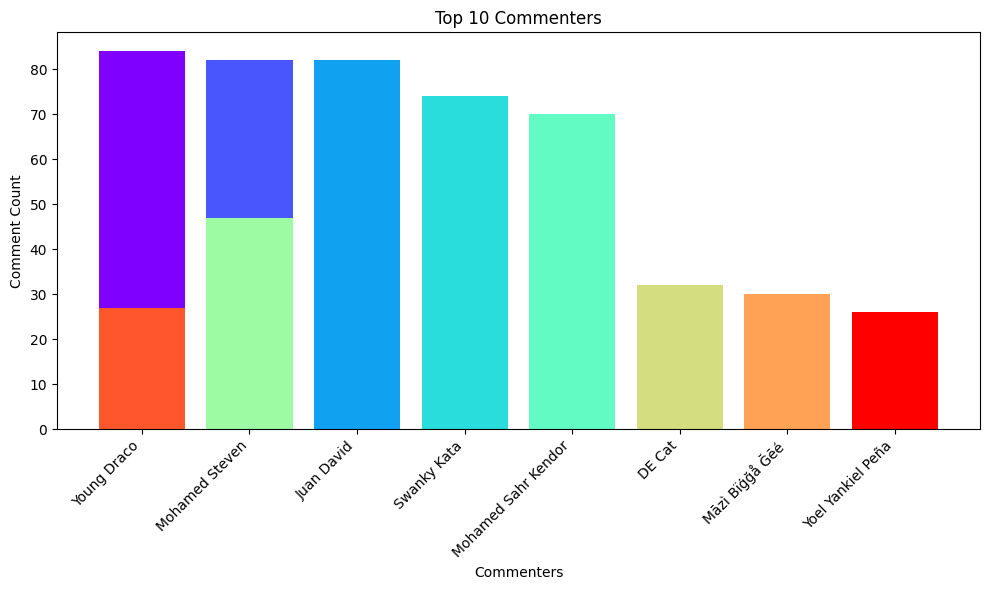

In [ ]:
top_10_commenters = comments_df.groupby(['commenter_id', 'commenter_name']).size().reset_index(name='comment_count')

top_10_commenters = top_10_commenters.sort_values(by='comment_count', ascending=False).head(10)

top_10_commenters.reset_index(drop=True, inplace=True)
top_10_commenters.index += 1

print("Top 10 người comment nhiều nhất:")
print(top_10_commenters)
print()
colors = cm.rainbow(np.linspace(0, 1, 10))
plt.figure(figsize=(10, 6))
plt.bar(top_10_commenters['commenter_name'], top_10_commenters['comment_count'], color=colors)
plt.xlabel('Commenters')
plt.ylabel('Comment Count')
plt.title('Top 10 Commenters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

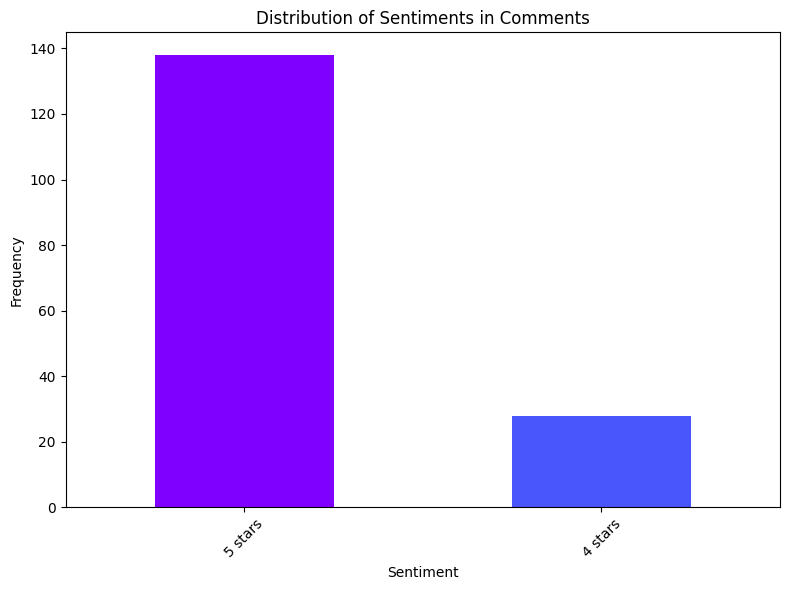

In [ ]:
from transformers import pipeline
import pandas as pd

sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
comments_subset = comments_df[(comments_df['commenter_id'] ==  61550006841608) | (comments_df['commenter_id'] ==  100069263154344   ) ]
sentiments = []
for index, row in comments_subset.iterrows():
    comment_text = row['comment_text']

    sentiment_result = sentiment_analysis(comment_text)

    sentiment_label = sentiment_result[0]['label']

    sentiments.append(sentiment_label)

sentiments_df = pd.DataFrame(sentiments, columns=['Sentiment'])

sentiment_counts = sentiments_df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiments in Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
comments_subset

Empty DataFrame
Columns: [comment_id, comment_url, commenter_id, commenter_url, commenter_name, comment_text, comment_time, comment_image, comment_reactors, comment_reaction_count, replies, comment_reactions.like, comment_reactions.love, comment_reactions.haha, comment_reactions.care, comment_reactions.wow, comment_reactions.angry, comment_reactions.sad]
Index: []

In [ ]:
top_comments = comments_df.sort_values(by='comment_reaction_count', ascending=False).head(10)

top_comments.reset_index(drop=True, inplace=True)
top_comments.index += 1
print("Những comments có nhiều reactions nhất:")
print(top_comments[['comment_id', 'commenter_name', 'comment_reaction_count']])

Những comments có nhiều reactions nhất:
          comment_id         commenter_name  comment_reaction_count
1   1077363306728244         Matt Grattidge                   141.0
2    311271821775869            Sajid Ahmed                    67.0
3    668520415269470          Michael Cooke                    32.0
4   1396830927863201         Richie Howlett                    30.0
5   3243127965987183           Dawn Probert                    22.0
6    357228913481151  L CF Never Walk Alone                    20.0
7    997024304722281           Bidjah Allan                    18.0
8    697330149126685             Obed Bulus                    16.0
9   1061292721851957           Carlson Chan                    15.0
10  1070998080882101           Carlson Chan                    15.0


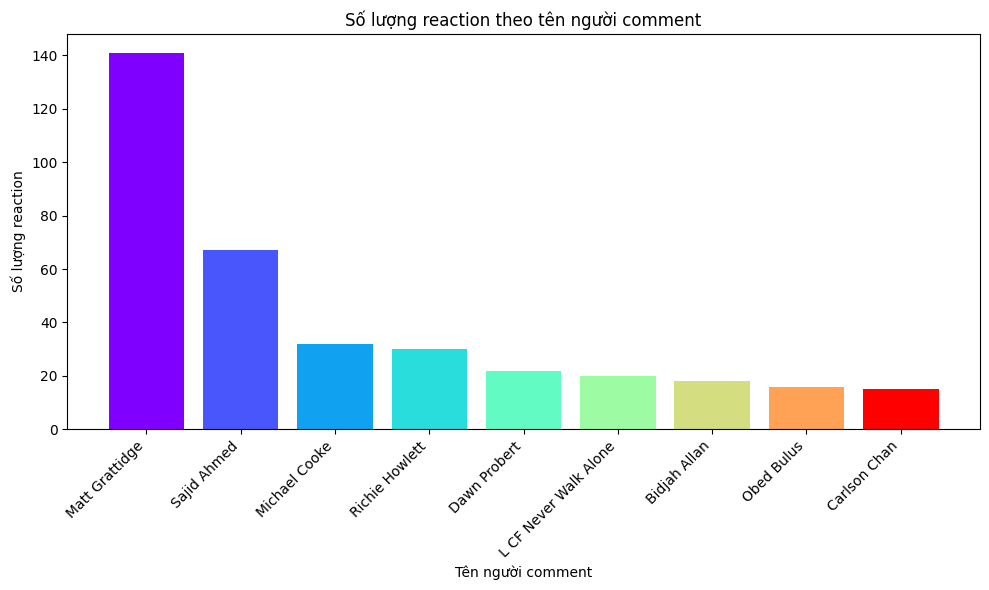

In [ ]:
top_comments_data = top_comments[['commenter_name', 'comment_reaction_count']]

plt.figure(figsize=(10, 6))
plt.bar(top_comments_data['commenter_name'], top_comments_data['comment_reaction_count'], color=colors)
plt.xlabel('Tên người comment')
plt.ylabel('Số lượng reaction')
plt.title('Số lượng reaction theo tên người comment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:

top_comments_texts = top_comments['comment_text']
print("Nội dung của top 10 comments:")
print(top_comments_texts.to_string(index=False))

Nội dung của top 10 comments:
Fantastic result without being at our best against that opposition. Really think it’s time to put some trust in Endo and get Mac Alistar back in a more natural role.                                                                                                                                                                                                                                   
Curtis Jones needs immediate replacement he's doing nothing                                                                                                                                                                                                                                                                                                                                             
Two years that I’ve been wondering if it touched the ground or not…                                                                                                                     

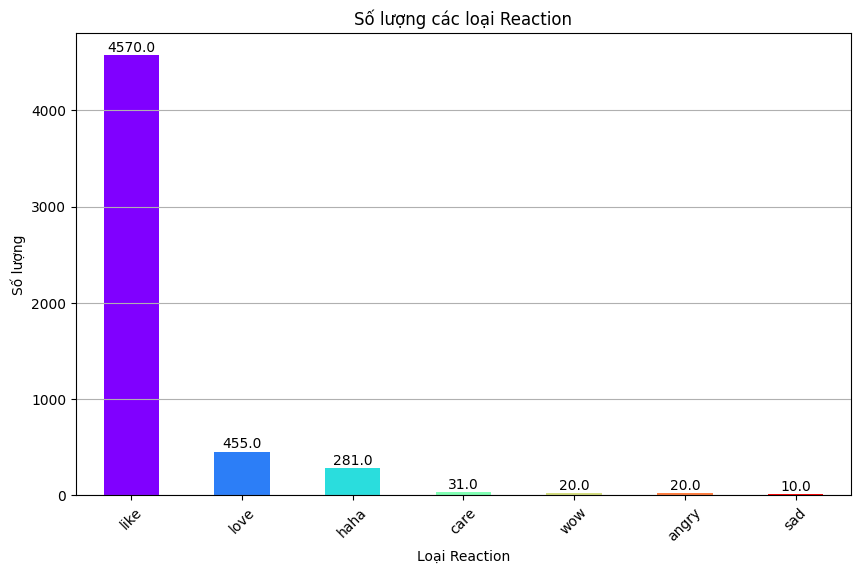

In [ ]:
import matplotlib.cm as cm
reaction_counts = comments_df[['comment_reactions.like', 'comment_reactions.love', 'comment_reactions.haha',
                      'comment_reactions.care', 'comment_reactions.wow', 'comment_reactions.angry',
                      'comment_reactions.sad']].sum()

reaction_counts = reaction_counts.rename({'comment_reactions.like': 'like',
                                          'comment_reactions.love': 'love',
                                          'comment_reactions.haha': 'haha',
                                          'comment_reactions.care': 'care',
                                          'comment_reactions.wow': 'wow',
                                          'comment_reactions.angry': 'angry',
                                          'comment_reactions.sad': 'sad'})
colors = cm.rainbow(np.linspace(0, 1, 7))

plt.figure(figsize=(10, 6))
reaction_counts.plot(kind='bar', color=colors)
plt.xlabel('Loại Reaction')
plt.ylabel('Số lượng')
plt.title('Số lượng các loại Reaction')
for i, value in enumerate(reaction_counts):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
len(comments_df)

13070

In [ ]:
comment_clarify = comments_df['comment_text'].drop_duplicates().tolist()
len(comment_clarify)

10828

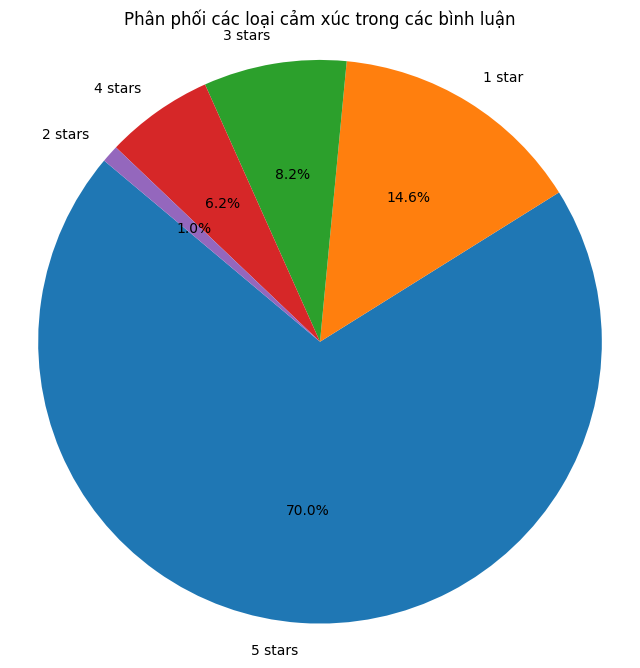

In [ ]:
sentiments = []
for comment in comment_clarify[2000:2500]:
    sentiment_result = sentiment_analysis(comment)
    sentiments.append(sentiment_result[0])

sentiments_df = pd.DataFrame(sentiments)

sentiment_counts = sentiments_df['label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối các loại cảm xúc trong các bình luận')
plt.axis('equal')
plt.show()

In [ ]:
sentiments = []
negative_comments = []

for comment in comment_clarify[:100]:
    sentiment_result = sentiment_analysis(comment)
    sentiments.append(sentiment_result[0])

for i, sentiment in enumerate(sentiments):
    if sentiment['label'] == '1 star':
        negative_comments.append(comment_clarify[i])
        if len(negative_comments) == 10:
            break

for comment in negative_comments:
    print(comment)

Bad luck guys
I hear Alot of people saying "how can they become rich". What I keep on telling them is that if you want to be rich you should not work for money.

90% of money is debt, if you want to be rich you need to know how to use debt to become rich. Before 1971 the united states dollar was backed up by the gold standard - that means every single dollar in the bank was having a gold standard on it.

So after 1971, the united states president remove dollar from the gold standard so now dollar 💵 is not back by anything. Now the banks can keep on printing Alot cash as they want in exchange for value item like gold, government securities.
Allison
Tsimikas
Vvd
Matip
Taa

Gravenbech
Endo
Soboszlai

Nunes/Gakpo. jota salah
Where is alcantara


In [ ]:
reactor = pd.read_csv("/content/drive/MyDrive/pythonreactor.csv")

In [ ]:
reactor

name  \
0      Idze Pro                 
1      Win Hlaing               
2      Sihaamita Axmed          
3      Ibrahim Shehu Sani       
4      Abdul Basit              
...            ...              
32409  Râmûzÿ Sàdèrô Ourobody   
32410  Shrif L FC               
32411  Andrew Ivanovic          
32412  Alao Olajimi             
32413  Mfon Jonah               

                                                                                                                                              link  \
0      https://facebook.com/profile.php?id=100095762190420&eav=AfYd2nUuXVT4Y52cs08i909K2gBr3rck7IqT5po6oj8LC_LC0s4zPfc8k5Ry1JmEOQg&fref=pb&paipv=0   
1      https://facebook.com/profile.php?id=100095604661759&eav=AfblhPPpI2IzJpm5Ytnt4y46bEF_fDZ4X31A42ere89L_OJHRAuZvsOlsk1nYNCdH3I&fref=pb&paipv=0   
2      https://facebook.com/profile.php?id=100095558555623&eav=AfaE--D6aBOlXRIYZs7TRoeFICYxk9Jm3-5sXrz036fXyDu8Ur-Fb3CW4XETmsyed7w&fref=pb&paipv=0   
3      https://facebook.com/profile.php?id=100095526664396&eav=Afbtc8uoL7yWKjwK2_dQ4OQUQu2oH4aQKjEl52vCf3ev0tPScWz8uCanuXmNuwWw4gs&fref=pb&paipv=0   
4      https://facebook.com/profile.php?id=100095409305615&eav=Afb5DSmkFTo53Ip-XSsaVtW8Q0sNYNKNAIP62MkY397maGEsQv9uANG4QLK5uFB89jw&fref=pb&paipv=0   
...                                                                                                                                            ...   
32409  https://facebook.com/profile.php?id=100095213528864&eav=AfaYVXXW1Ljs_gEAFV9GsA1h7kapWyW2wZO0VxkflOpR1OjdQVP7YdWIzxBAKqPfk-0&fref=pb&paipv=0   
32410  https://facebook.com/profile.php?id=100095204861850&eav=AfaM_zW5GzN7sJVP5j6blxg2J0MVTw3r6XzfZHfLVqNQq6HB4x08vF7xEOQUALT-Bek&fref=pb&paipv=0   
32411  https://facebook.com/profile.php?id=100095202933451&eav=AfaBY0Q3J3hTrbbgBNVqi0jJIGRpxY-zxckjfUWVT7RA8ZBeCLMH2YUvRUmowTufEbs&fref=pb&paipv=0   
32412  https://facebook.com/profile.php?id=100095377331882&eav=AfbzSMZ8Q-5taqSTg1kk9b1jGAzJGXtGZKSfr9T9LsFmGrbhNEqVN8VJrCUSgOxGFiY&fref=pb&paipv=0   
32413  https://facebook.com/profile.php?id=100095200957853&eav=AfZULKQ9JqxYwU1N545qDxOyOjHsFkUIh3dRkCCOTP5z4hcn20xCvBXanIxoKCC5DWs&fref=pb&paipv=0   

       type  
0      like  
1      like  
2      like  
3      like  
4      like  
...     ...  
32409  like  
32410  like  
32411  like  
32412  like  
32413  like  

[32414 rows x 3 columns]

In [ ]:
reactor_counts = reactor.groupby('name')['type'].count()

top_10_reactors = reactor_counts.sort_values(ascending=False).head(10)

print(top_10_reactors)

name
Ewa Larry             66
Daniel Slobin         66
Abdul Basit           61
Ibrahim Shehu Sani    60
Enoch Kwesi Arthur    41
Abdu Sh               39
ศริญญา หุ้มแพร        38
Deru Tesfa            37
Isaya Kituyi          37
Sihle Mapoko          35
Name: type, dtype: int64


<ipython-input-91-2efb31b4b705>:7: UserWarning: Glyph 3624 (\N{THAI CHARACTER SO SALA}) missing from current font.
  plt.tight_layout()
<ipython-input-91-2efb31b4b705>:7: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  plt.tight_layout()
<ipython-input-91-2efb31b4b705>:7: UserWarning: Glyph 3636 (\N{THAI CHARACTER SARA I}) missing from current font.
  plt.tight_layout()
<ipython-input-91-2efb31b4b705>:7: UserWarning: Glyph 3597 (\N{THAI CHARACTER YO YING}) missing from current font.
  plt.tight_layout()
<ipython-input-91-2efb31b4b705>:7: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  plt.tight_layout()
<ipython-input-91-2efb31b4b705>:7: UserWarning: Glyph 3627 (\N{THAI CHARACTER HO HIP}) missing from current font.
  plt.tight_layout()
<ipython-input-91-2efb31b4b705>:7: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from current font.
  plt.tight_layout()
<ipython-input-91-2efb31b4b705>:7: UserWarning: Glyp

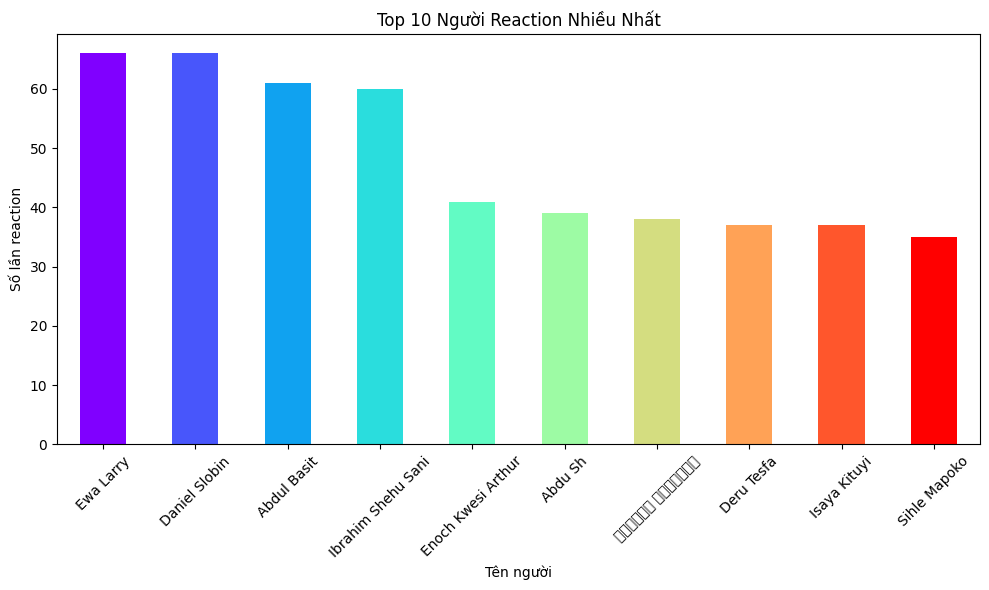

In [ ]:
plt.figure(figsize=(10, 6))
top_10_reactors.plot(kind='bar', color= colors)
plt.title('Top 10 Người Reaction Nhiều Nhất')
plt.xlabel('Tên người')
plt.ylabel('Số lần reaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

reaction_counts = reactor.groupby('name')['type'].value_counts().unstack().fillna(0)


In [ ]:
reaction_counts['sad'] = reaction_counts['buồn'] + reaction_counts['sad']
reaction_counts.drop(['buồn'], axis=1, inplace=True)
reaction_counts['care'] = reaction_counts['thương thương'] + reaction_counts['care']
reaction_counts.drop(['thương thương'], axis=1, inplace=True)
reaction_counts['like'] = reaction_counts['thích'] + reaction_counts['like']
reaction_counts.drop(['thích'], axis=1, inplace=True)
reaction_counts['love'] = reaction_counts['yêu thích'] + reaction_counts['love']
reaction_counts.drop(['yêu thích'], axis=1, inplace=True)

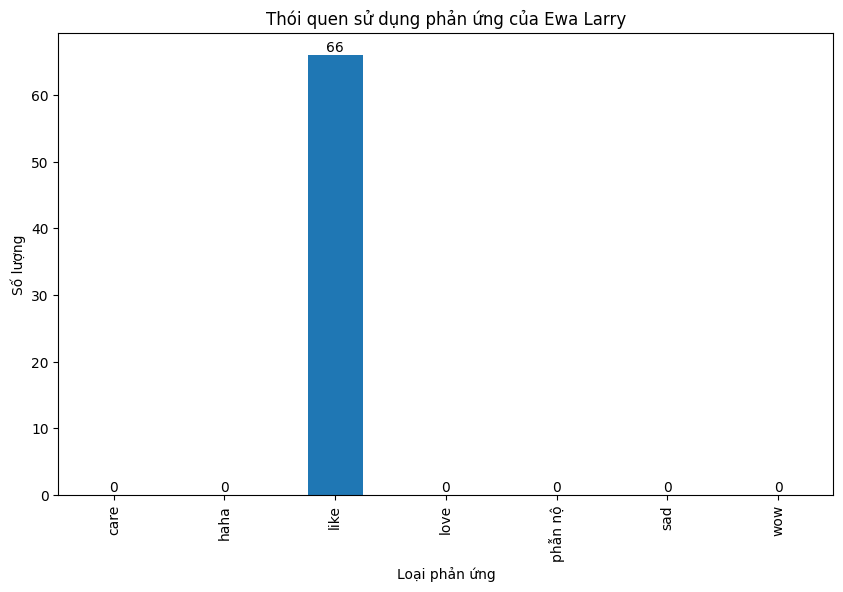

In [ ]:
ewa_larry_reactions = reaction_counts.loc['Ewa Larry']
ax = ewa_larry_reactions.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Loại phản ứng')
plt.ylabel('Số lượng')
plt.title('Thói quen sử dụng phản ứng của Ewa Larry')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   xytext=(0, 5), textcoords='offset points')

plt.show()

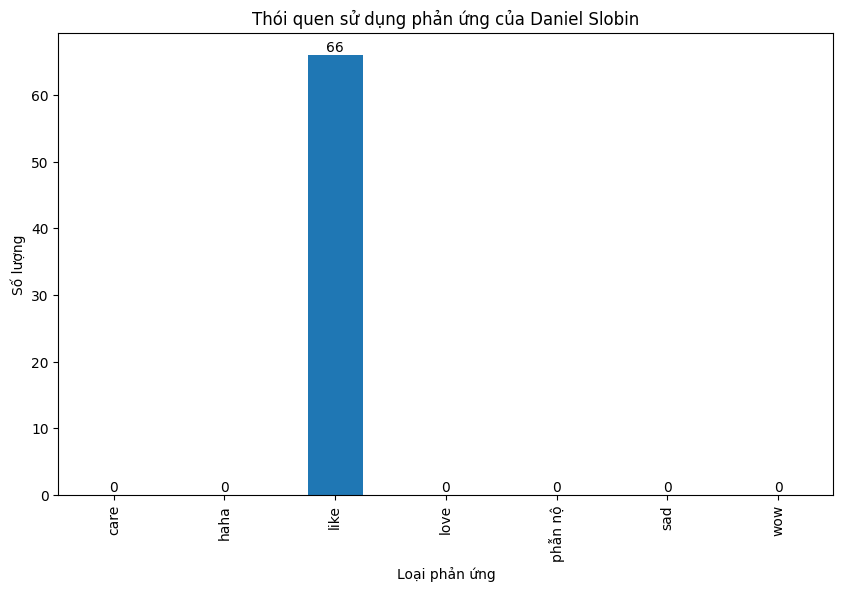

In [ ]:
daniel_reactions = reaction_counts.loc['Daniel Slobin']
ax = daniel_reactions.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Loại phản ứng')
plt.ylabel('Số lượng')
plt.title('Thói quen sử dụng phản ứng của Daniel Slobin')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
names_to_find = [
    'Ewa Larry',
    'Daniel Slobin',
    'Abdul Basit',
    'Ibrahim Shehu Sani',
    'Enoch Kwesi Arthur',
    'Abdu Sh',
    'ศริญญา หุ้มแพร',
    'Deru Tesfa',
    'Isaya Kituyi',
    'Sihle Mapoko'
]

selected_reactions = reaction_counts.loc[names_to_find]
print(selected_reactions)

type                care  haha  like  love  phẫn nộ  sad  wow
name                                                         
Ewa Larry           0.0   0.0   66.0  0.0   0.0      0.0  0.0
Daniel Slobin       0.0   0.0   66.0  0.0   0.0      0.0  0.0
Abdul Basit         0.0   0.0   61.0  0.0   0.0      0.0  0.0
Ibrahim Shehu Sani  0.0   0.0   60.0  0.0   0.0      0.0  0.0
Enoch Kwesi Arthur  0.0   0.0   18.0  23.0  0.0      0.0  0.0
Abdu Sh             0.0   0.0   39.0  0.0   0.0      0.0  0.0
ศริญญา หุ้มแพร      0.0   0.0   2.0   36.0  0.0      0.0  0.0
Deru Tesfa          0.0   0.0   36.0  1.0   0.0      0.0  0.0
Isaya Kituyi        0.0   0.0   37.0  0.0   0.0      0.0  0.0
Sihle Mapoko        0.0   0.0   35.0  0.0   0.0      0.0  0.0


<ipython-input-112-9111c49cc0d4>:28: UserWarning: Glyph 3624 (\N{THAI CHARACTER SO SALA}) missing from current font.
  plt.tight_layout()
<ipython-input-112-9111c49cc0d4>:28: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  plt.tight_layout()
<ipython-input-112-9111c49cc0d4>:28: UserWarning: Glyph 3636 (\N{THAI CHARACTER SARA I}) missing from current font.
  plt.tight_layout()
<ipython-input-112-9111c49cc0d4>:28: UserWarning: Glyph 3597 (\N{THAI CHARACTER YO YING}) missing from current font.
  plt.tight_layout()
<ipython-input-112-9111c49cc0d4>:28: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  plt.tight_layout()
<ipython-input-112-9111c49cc0d4>:28: UserWarning: Glyph 3627 (\N{THAI CHARACTER HO HIP}) missing from current font.
  plt.tight_layout()
<ipython-input-112-9111c49cc0d4>:28: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from current font.
  plt.tight_layout()
<ipython-input-112-9111c49cc0d4>:28: U

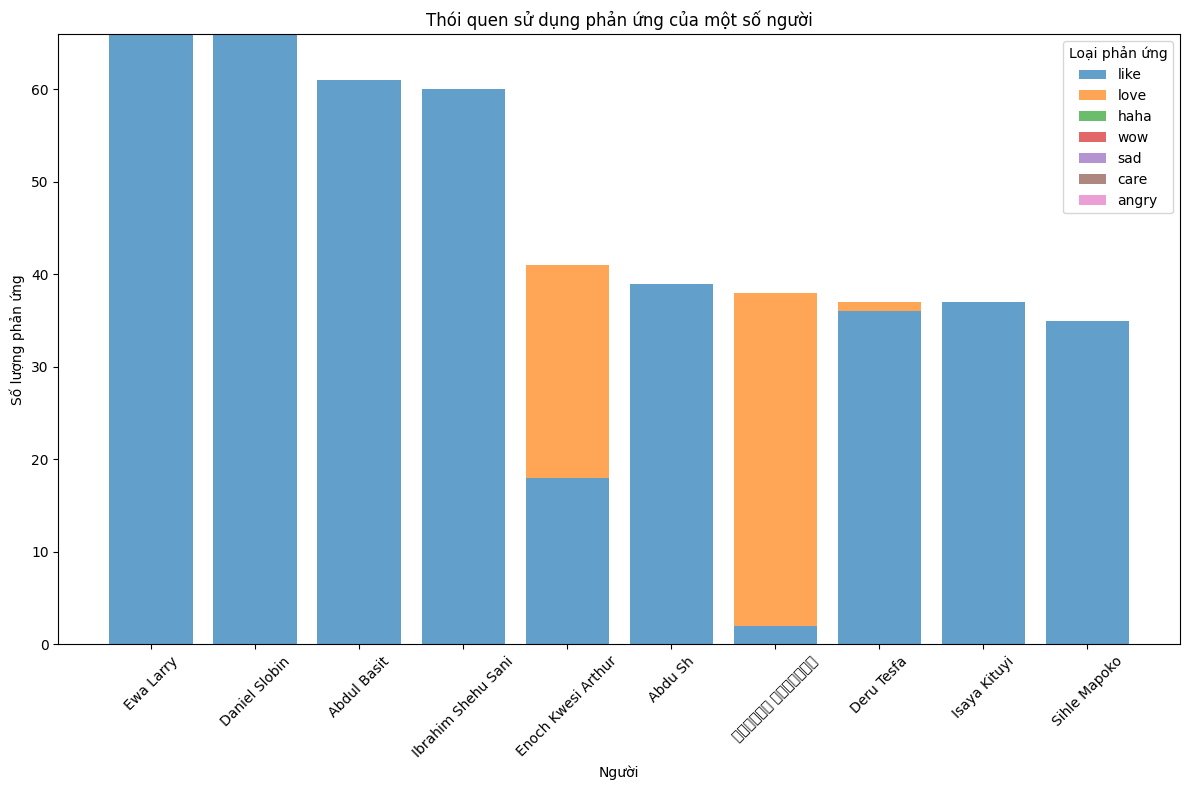

In [ ]:
names = selected_reactions.index.tolist()

likes = selected_reactions['like']
loves = selected_reactions['love']
hahas = selected_reactions['haha']
wows = selected_reactions['wow']
sads = selected_reactions['sad']
cares = selected_reactions['care']
angries = selected_reactions['phẫn nộ']

plt.figure(figsize=(12, 8))
plt.bar(names, likes, label='like', alpha=0.7)
plt.bar(names, loves, bottom=likes, label='love', alpha=0.7)
plt.bar(names, hahas, bottom=likes+loves, label='haha', alpha=0.7)
plt.bar(names, wows, bottom=likes+loves+hahas, label='wow', alpha=0.7)
plt.bar(names, sads, bottom=likes+loves+hahas+wows, label='sad', alpha=0.7)
plt.bar(names, cares, bottom=likes+loves+hahas+wows+sads, label='care', alpha=0.7)
plt.bar(names, angries, bottom=likes+loves+hahas+wows+sads+cares, label='angry', alpha=0.7)

plt.xlabel('Người')
plt.ylabel('Số lượng phản ứng')
plt.title('Thói quen sử dụng phản ứng của một số người')
plt.xticks(rotation=45)
plt.legend(title='Loại phản ứng')
plt.tight_layout()

plt.show()

In [ ]:
len(reaction_counts)

19885

In [4]:
unique_commenter_ids = comments_df.drop_duplicates(subset=['commenter_id'])['commenter_id'].tolist()

In [5]:
len(unique_commenter_ids)

9898

In [6]:
formatted_ids = [f"{str(uid)}" for uid in unique_commenter_ids]

In [ ]:
!pip install facebook_scraper

In [7]:
from facebook_scraper import get_profile
commenter = []
for id in formatted_ids[0:500]:
    try:
        user = get_profile(id,cookies = "/content/drive/MyDrive/python/www.facebook.com_cookies (2).txt")
        commenter.append(user)
        print(f"Added profile no.{len(commenter)}")
    except:
        continue


/usr/local/lib/python3.10/dist-packages/facebook_scraper/facebook_scraper.py:855: UserWarning: Facebook language detected as vi_VN - for best results, set to en_US
  warnings.warn(
ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'


Added profile no.1


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=169474486071260&id=100090261290780&set=a.111766938508682&eav=AfaiyQL9CncyUo3r05rXW5hQ0Gtp21vklG4AQM3m1ejbeYnk0K-q_tJxLh-RtVSs-bA&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY-WXl5cyp3OEoBZ-Xjn1tv_RnrrcX2aVKKU6A5p0Tu55BJLRnwe1Lm93sJANSMH8xV9spFSGC42DWkajrU-GA-I47wXzcH5i6wEu0dt8DvddoRUnV6G6uPWzuC_EM8O5f5NUdvd2Eoibj1hfWjsif-HIbuQ_qHDh8BIjnbYUiEKpfQSkqO84wcrSLJm0Z4GoVmKb5udEKHZpdJ8nJi-jmmcmMztu6T9hOI0Cf1JtTr0y90RiWJ9FzOzl0BhBTyXMpIA-GUSKWRUdayS4mRGeMH2N-qI5UszQ3zwxXukSm39qTz7-M5FW8jAzR3IMBMiY-\-\BO8GZ-xH_IPUgFQ9JBps6TFzO6JXklRmJCet8bDdcuDInviaKBsbRrH_Ydg1fBOGVwmhP_u9f1ak2rp-bI7tg7xjE5g53kSEwxW2UuB-o5MjnoRqWzx2Z3o0x6-ogjp1r8uijCAf3w497VJot8UGqYUH

Added profile no.2


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'


Added profile no.3


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'


Added profile no.4


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'


Added profile no.5


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
/usr/local/lib/python3.10/dist-packages/facebook_scraper/facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100044337368486%3A103382489711013%3A33&paipv=0&eav=AfbBLBCB3TNMckKCgPJ2fks6g-fxGy0uBscKbbx7Cz67rlcxdCBx0d5DYl-ILG2Ilbk&_rdr
  warnings.warn(
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: 'NoneType' object has no attribute 'text'


Added profile no.6


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.7


ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.8


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.9


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: list index out of range
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.10


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=110417701502507&id=100076028335024&set=a.110417768169167&eav=Afa9sI-5735qMqcr3KZ8rZ3wwXLut4x5ahQa1ZsLPzdK6aM2EQ2vfDsHbb1Rvt3hPUw&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY-udxm7ZGt5FKczPa4EFfCv4DlwLHw3B3K7XLHJAXTrhgst4CUMU6XydxS25m5oIPW3whqId4lhHT7xiXqarSAmeCytE79h0MPtc9ztbmbdLdAubAbP6CXLIoH0vinW1pZFdDtRwQ_sGwussOEHCD9fADpXFLJBZjj6o4wAbcX06kVynSO3S8iKtfXuwDrkdx-iUqAoGqY86g2kxk3tjmanmJgJXgwdRH61A9pzQPXWprRx2PLSNxQU9DtxoXLLC51fx9k9KklEWC5udUmj1dQueFXBYRjSOY6Z1irfwD-lZRx9GoxzrlkAGmY9N4tv3sr_ALGgqz7cvV5_zOBdallvpwyMcuNrL9u_ikf

Added profile no.11


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.12


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.13


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.14


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.15


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.16


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.17


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.18


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.19


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.20


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.21


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.22


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.23


ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.24


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.25


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
/usr/local/lib/python3.10/dist-packages/facebook_scraper/facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100001416559882%3A103382489711013%3A33&paipv=0&eav=Afa4c9--IzxCX1cS3_JXiAegx79TJjFgrztgJS6gFWSFypX5Ub3spJm96eceI6tCJGA&_rdr
  warnings.warn(
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: 'NoneType' object has no attribute 'text'


Added profile no.26


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'


Added profile no.27


ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'


Added profile no.28


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'


Added profile no.29


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'


Added profile no.30


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'


Added profile no.31


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'


Added profile no.32


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.33


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.34


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.35


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.36


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.37


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.38


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.39


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.40


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.41


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.42


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.43


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.44


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.45


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.46


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.47


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.48


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.49


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.50


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.51


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.52


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.53


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=3439570619657138&id=100008127008464&set=a.1384414095172811&eav=AfaN7vTWcFxQZrPVOToxYCQxlBo0TEMqP6ofGNbDc_49i3Zh0vg9x51yfFm6A41k4Iw&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY-qhBmo53dgwh3CDLvtQRujF3cx5G0PvSVETK5rzU1PWijzFw0UcZfGqnzCjiEMiGZhM9RIa1b5YAHw7wy2pE7Qtz6o5rvcBgz_F3JSfB6ay6SKowffZBaf1ZEOjgnnK6bjhcaKB2eNoOU1cf_OSS9xArWWw4S4Xx8SeX8tV1u7PhqzIHvpvHvSRpcHkg-\-\AuLPS4VBqdwBS5ZZw1S3Y-YH0rhaiJekYd80YfAI0aDPuIwx

Added profile no.54


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.55


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.56


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.57


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.58


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.59


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.60


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: list index out of range
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.61


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: list index out of range
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.62


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.63


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.64


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.65


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.66


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.67


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.68


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.69


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.70


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.71


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.72


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.73


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.74


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.75


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.76


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.77


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.78


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.79


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.80


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.81


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: list index out of range
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.82


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.83


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.84


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.85


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.86


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: list index out of range
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.87


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.88


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.89


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.90


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.91


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.92


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.93


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.94


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.95


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.96


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.97


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.98


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.99


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: list index out of range
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.100


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.101


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=24089489800650403&id=100000481575827&set=a.157626670930051&eav=AfZC70Ott8h1uaWaAc3x9J5XqQqV25DXK7UzJ-zYJf57JnFs5kDxoA9LJmfo1pOXcIw&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY9OGHq12qXb9jC1VFKbuR-QQeFV1ezPJzDHYe7AZCQmProalGjezarke_mwjwIyph5LQXvUC7AsWiP9Y_UBCFL5yarcjzFd6RXoZpUoooEO6hAg5xz4SYt5dyzjrZCTwwRWvRJtXpo743aCHIrA2bbVcBur8Dj59nfxv9XO_7ip5nOSyDJiuEc-0wesbzffeizupcsmwYKy8-Dq235q9sDqk3dz-eRz7BPpMkZ8ytyQIJa7yL

Added profile no.102


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.103


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.104


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.105


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.106


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.107


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.108


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.109


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.110


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.111


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.112


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.113


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.114


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.115


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.116


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=1435936900472057&id=100021672829970&set=a.174509126614847&eav=AfYb0WX8kvKk0k115NmlX6YBGkbM5ZqpBaXUzZxBEk5pqFYpwQpSkf1HIt09aoo4fHM&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY-oL66B_ki3XrbdM3epeq6u8wISGelNDZ0dz41ynb0htXgAafPFsDIvroLhZ63gLO3mz6NRrOWf2RDjvGf5QzY2ZeZMJZvMCPwlqCIDVs4BLL-687fo2anss-qmf0CT46T1U0idHaGh_BqO8EaFUujav20rKK1hyBzAg79wX-HRte5kLu4vGmt0ptULXXUfHmDC9d8KQp3PBj9jiK0tfeTwQh5u11U1fNBLzKLVPxlx_sQH2UTu5nHXYWAZuuxUicEwFdJ6SvoBumE03TqUaBctZ0Sy5r_fZdMbdSfYQpx8gCmBfyysDRQwEmlG-wWiRoiQYBHxFxSAZT1foh_HV6lnoC4bsgHcFxAv6q

Added profile no.117


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.118


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo/view_full_size/?fbid=1379831062493671&ref_component=mbasic_photo_permalink&ref_page=%2Fwap%2Fphoto.php&refid=13&_ft_=encrypted_tracking_data.0AY91U-A2MsqYCEICGVAOlzmdEV2L1sJmr-CbCRoiDjF7PVAaT1eFI0vo8FYxOcoNGcZs3Ol-v7mlx6EtJQFnU0zbMNX9QF30m3iKbZmnmSh81EzKS8sLftFVVWM_HPxwmZXWosd9V6EE4CbOOAjL4MhRe8v-\-\bUyjMtCJG5Ur7elgGLwg8tOI7JZO_DxQe739urtazBzu2zhLotOr_Z14CZsKTFf_ivsOpfX8k3W6hTyGs4qBVoVuus8c9dWh8moSIc9wq7nx3ytf8Pc9O2m_eAuHP32ECw0F6pAz3yAGow41qweGOBzado8N-Kr_N_hQGWugY2Jk4-duym62D3WU40u4MV-KkfWjyFiM7ErBXtp70Kbm2J2-3bS0BaihGHt4TPzR9HmnyLM4w_Pc8MiScJy76qjQkB6uv-FDgx0WKDK

Added profile no.119


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.120


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.121


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.122


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.123


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.124


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.125


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.126


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.127


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.128


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.129


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.130


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.131


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.132


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.133


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.134


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.135


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.136


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.137


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.138


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.139


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.140


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: list index out of range
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.141


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.142


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.143


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.144


ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.145


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.146


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.147


ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.148


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.149


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.150


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.151


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.152


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.153


ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.154


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.155


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.156


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.157


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.158


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.159


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.160


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.161


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.162


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.163


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.164


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.165


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.166


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.167


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.168


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.169


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
/usr/local/lib/python3.10/dist-packages/facebook_scraper/facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100027447527204%3A103382489711013%3A33&paipv=0&eav=AfblbZQJSMmcW1WQxl8jcnEn6cjV_XepOnZJtMnuj47EVlU0JgjgL4Pv-ftyxS9lxPs&_rdr
  warnings.warn(
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: 'NoneType' object has no attribute 'text'


Added profile no.170


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'


Added profile no.171


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=869216277980328&id=100046758919897&set=a.118227609745869&eav=AfYSrOeNpPtWnYqIXlf9AStfWd8adIZ2OCCeJA_hHz9gaEua2HwsF1Gia7DblNwJM-c&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY8MyL5BjYrrLGPYPTPB_s7mYQtXSpNXxVkCjHU14vV7ALtUZ4zR-VHrxk6_DNBSolYrOhjYSy7iaS19LLq-xiAlPhit9YShfNo0se1hQG3NCcxcIQ0-\-\tH4J6cwvgD_QMC6E_a33ywJtpNP6oGlvxYOFvJg33v_u4RGks_6cA_CZ9Gib8_EE9Ttdg2Vx_OBbzrkQHd99iB90tYupx5ZYSpjKnYJrwthCSf8MCQtUOfAbqxfC4A7wBGM0HmsxVHgA1LXLCWbJN3UyXzXaQeL2JhkLlpIp8Rz4eTE8f3ZYlj4LQ798pG1kUrxwOAaN7tvvkNTp-7FBdHQYPOU_malVdvJBG4BqBRQdppWQuqNl6HbBCsArGSyP3JJe3Nueel1l4H1ZmMkUrSZnf3emjgQwbVtieIFOTFe5YSK_NbMX0pfqBPe3oWScN8wGp4iE23CJCL6g3SMAm-4jQVSfB898w0DKeP

Added profile no.172


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'


Added profile no.173


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
/usr/local/lib/python3.10/dist-packages/facebook_scraper/facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100044312138978%3A103382489711013%3A33&paipv=0&eav=AfZHGgogsacpqjGmzR5P8kXIyw40VeFcLk_C4grkLxHXA7FY7FJo_B-q4hP1mgfuJgM&_rdr
  warnings.warn(
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: 'NoneType' object has no attribute 'text'


Added profile no.174


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
/usr/local/lib/python3.10/dist-packages/facebook_scraper/facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100086517849272%3A103382489711013%3A33&paipv=0&eav=AfYsaD7AGqvMdw-h__iTDasYBbYMxRPySTO-hLVLppRyYiGOC5X_P_Phqw2UOm6-CU4&_rdr
  warnings.warn(
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: 'NoneType' object has no attribute 'text'


Added profile no.175


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.176


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.177


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.178


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.179


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.180


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.181


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.182


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=252840260182600&id=100063698831708&set=a.131055172361110&eav=AfYlqtfq0Ocywgc2cmm6O6S0AsrHvHp35L_EyQnE0nNiuk7JcrfAUUC_gyFkk2C652Q&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY8ujwTl4fJx-UWw6KE-\-\M-5xDqRzw-o0hZp-ZMoaQtmRCW1laxqUhoN8abzeDwiw0cSkgGHWzF4cKouBK7832FXQNtNDcxCQVp7zAO9voJiAtcNK6LhZhiXP-DASd_InjO6w9pd4U8tT0z_enDOQn6WBEC1egPPzApxdfuZ5H7oRW-BXt6iV2WfUlHZjQLUp9zBSmWWGCRLTBDLMiw7Be2fnvZ5w-zMdwJxh20L4u_ctAA9B2

Added profile no.183


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.184


ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.185


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.186


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.187


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.188


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.189


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.190


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.191


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.192


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo/view_full_size/?fbid=3824516417660315&ref_component=mbasic_photo_permalink&ref_page=%2Fwap%2Fphoto.php&refid=13&_ft_=encrypted_tracking_data.0AY972Ib_-zz3Crs-qrAxdj7f360v2XggE21mrfxf3pCzoVFKlcFj7uHwe4sFih_PzBe3mnilpgHlF3I4dHamF82U2ziG4TkBKkURLS19CfxDXeJdNY1plY8k8THfbr1pBfHZBdRZ6VvS9kM2yU5ntt2o53Ah4OmGEozjrLVknUwq_IBKXbBEaVSIbLRC1XBCWyi5_Br9sJJnmFrIorBojpJN06X9eswMXvHTbxT8iO-nVX51iptIutjp7KkjFpCP-VBcwk_zXVRy4q9a-kWrOsGm3JKT0fRKNoMWg4jqj1sism5CgaHXA8smLux

Added profile no.193


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.194


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.195


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.196


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.197


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.198


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.199


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.200


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.201


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.202


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.203


ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.204


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.205


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.206


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.207


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.208


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.209


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.210


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.211


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.212


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.213


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.214


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.215


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.216


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=5457739044294565&id=100001755706415&set=a.326842937384227&eav=Afan_21ia0jrMyftKbZODloXJU26SW6LljDqM3UEM6z_c0lmsfmS5i2AD7fQoGsXPyQ&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY_Z7GImp1vOqonbdPfd-\-\5WkXAYO__531bh-q6e-dzA9rmBq5MlzFyrRb5U_7LB_snKRPeLOK0GGdKdEqnH88vfe80W7FbwlRe1oOMaVgBCS0FvSVfPbQLvKWgU53GgZMAZSZ1ENmCVDS-Es9sx5lgsV0Q5wtheq4tZuZkQJfbTzmG7zyE6ZkfKfS2gjJwb9rH385WYw-LRuIS5WecRevgD9-LXrD6wn-P5ePdDM7kMWOkGf

Added profile no.217


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.218


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.219


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.220


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.221


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.222


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.223


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=1764347970675757&id=100013017137650&set=a.135062830270954&eav=AfaO0E622IJRjAatJXGb30LPc_9VpBnp-D72nyl7AR-0RrVaVjTFcBhNZKk0JR9F30g&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY8gRIluN45y6N5ZWB_0RsAetA8K21GLwh0Ms2BgT7rxDLsZyvUbDcMmItH_5QjmOMSaFHnT_HvqbmHjDj8paN8sbn843fxrCRX0SIJDlks3ve8vc7HFW3ED2uIELp-HEapldYiQE8ZIo2I0UaYputj5BbPccHDEJoAXz4eAs6ZrG2TmHazlZ0fYNmpJb5fYBeO9DAu31_Pq_owb_gL7gumfcCqeOzwLhDobVm07YH36TrnQUpo

Added profile no.224


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.225


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.226


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.227


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.228


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.229


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.230


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.231


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=870178560855353&id=100035896518582&set=a.107382533801630&eav=AfYVElesMetiFgD4Lxy2HpbzyMxfKekr9JkWEYhlGvg5qEmyLefXoqauLdLhtUuUK-s&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY8T1QSzp3aWmvvMbMLTcigf3GsTR6VHHnRf-1j59-x66x9uIpinoC3SJGM_fApAXqcNxRymoUR8nKpN_x1WfW3Az4SrsT6kEpcq51uaHaeEyUEbwtmmyQwndEO9zoiVfcF8BE_YVKYWENsS6ax8ZxZgIiFor1w09ovhbwsTlYRKEnEItbLyLV9SuhlYcd5Wz3bjxGmIb4pfMLzX2ftmswCG7JPwnTwOF4JhyLeGEJO-zMOMnrcI

Added profile no.232


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.233


ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.234


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.235


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.236


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.237


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.238


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.239


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.240


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.241


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.242


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.243


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.244


ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=2600336533541090&id=100006943058523&set=a.1401123336795755&eav=AfaquhYZthn0jUCeyMNI1m4_lilM-LJ7enFyqITemtG6ETYlvfNSfIufaSbLua0vd-Y&paipv=0&source=48&refid=17&_ft_=encrypted_tracking_data.0AY-9nOo6tpNp6KMpyjGQkk7wXyT-\-\UzsCenNKFnZ1jxYi3B_rnaZMCDx1LZ07b4WgXxAZdZo0j9Hm6IdpYjzynCTnNhv0HSfV-xN6yED6rbMhY0kIDpWrOVaSJvJQtuCn6W-oVFxMOQ8HeNLZ_070EUaWvjaUvlRoFEewj8V-nJo5G30_zC3Kn6oJzWGaCdvtsg5zw3SLfbQjxAw-iVfbKPWTcbhJt9SKzTvlHkiEZPWQ6lMNLSAOU0Hz_ok2ed0dhvbwxz5XUXaIuWfS1R0uFPCD1aWAS95QKxLpmUp1Oao-_6JikaOzzjjNEP6ejYb97XQSaYgCtIwqI9teXmvAyW_Xd8VT11CUbAanSr1lxzKvJYBmVn0xOAIuup25XWI31Pj0ihgh29s8SQ9Cdbt_E0nWHgeAlqCGzIylOghXUzsaVlqtaectaK8a1MZxBgTkax4buu1dBpU4uMxE0dawhDwBLj26mE-qc3fn1ofV-wLKmcbRIS7OB1hkS4IrpEctcDcSmzTgkmjXLakXOpSgzwV8KWlai2mA-F5XhVGkYO5DBwb2hdyh_LTf4H1OER0Tl1PRBJS-P_WFtu-ZXGa5F7lN6cYBdIvQ6Pm54IuLP1mxyqbxj-hH8iPmQOGiLrTNJxPXy9k5glfHLnZcfc7fmI64R1Qwwt2gVQS4vZOvIUXh1TTzjIgJaJBgzei

Added profile no.245


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.246


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.247


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.248


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.249


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.250


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: list index out of range
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.251


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.252


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.253


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.254


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.255


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.256


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.257


ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.258


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.259


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.260


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.261


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.262


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.263


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.264


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.265


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.266


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.267


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.268


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.269


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.270


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.271


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.272


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.273


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.274


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.275


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.276


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.277


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.278


ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.279


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.280


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.281


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.282


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.283


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.284


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.285


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.286


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.287


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.288


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.289


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.290


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.291


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.292


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.293


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.294


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.295


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.296


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.297


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.298


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.299


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.300


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.301


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.302


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.303


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.304


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: list index out of range
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.305


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.306


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.307


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.308


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.309


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.310


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.311


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.312


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.313


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.314


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.315


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.316


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.317


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.318


ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.319


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.320


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.321


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.322


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.323


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.324


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.325


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.326


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.327


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.328


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.329


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.330


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.331


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.332


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.333


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.334


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.335


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.336


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.337


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.338


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.339


ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=1070885733248229&id=100009804373248&set=a.142526066084205&eav=AfY9XqKnDhD7GO2p73HtkS3BsR0CwbaYnEO9bOyOS7ko4I92iMGglYkaqG3qNQZrLRs&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY9vk1gugUJkM2uMhclBqzKSuaPNB0IgLPouXs3VAkh-FDArefVvKYizIYhWQDWyn8_zOUQWJy56yCmT_K3iBJMJD4YpeB5V37bfmlStIPg5ZjJ5VZ7w-\-\KcpJBO6d2rfIFTfZjV12PQFIlWeLFMn4oQmDeJDcYTLXR-agWWzhGdqzF3tsHauWWyCqP14m4mTaLnGxpH8j1dXqmgsSekFhGduFzsxY-akGWnX95ovgvPxK4hnGkD3CW7FR4TyIcMhFU8XWK5c5O1uG-RJbhTHqwVtHPMoSuPYLOK8UnFB3NErzjTZPHso5mYhvJ9jgq31hsMbTJtRziMwVpDulEFVPTJl8fgEpiQsbfw80hOuxiyham6z0M&__tn__=%2As%2AsH-R
Exception: HTTPError('500 Server Error: Internal Server Error for url: https://m.facebook.com/photo.php?fbid=1070885733248229&id=100009804373248&set=a.142526066084205&eav=AfY9XqKnDhD7GO2p73HtkS3BsR0CwbaYnEO9bOyOS7ko4I92iMGglYkaqG3qNQZrLRs&paipv=0&m_entstream_source=timeline&refid=17&_ft_=enc

Added profile no.340


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.341


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.342


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.343


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.344


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.345


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.346


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.347


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.348


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.349


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.350


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.351


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.352


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.353


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.354


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.355


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.356


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.357


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.358


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.359


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.360


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.361


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.362


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.363


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.364


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.365


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.366


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo/view_full_size/?fbid=745117184035893&ref_component=mbasic_photo_permalink&ref_page=%2Fwap%2Fphoto.php&refid=13&_ft_=encrypted_tracking_data.0AY9BvjDOVUYcttwOYIi0vlQSEHuN6d1WsYhOymvT9EK9gNiRclWDhrxJXshMJ2CaxBWcUZpwgS-YTTOz0EzZ_bswnxXAxzvfw1S6CkMqZPzlnPOQ6qTwpXYVQng3wrMgmUK3NGDIr5moZSYKSnvK4glgZCzkDcHRSdYfRfAuZagZiSqWWs3PYhrZgFAHBrVjRB9F7CSoZc16OhpWKIEFIgKROjqbQTTVAD3oHcrD7VRHgZvwZg7Aa6VKfWaSj4w9T61lUFtc8uQPeW12B78u4aVRENlpOr1b57czs8YE9jtNlM9d9UsII7C5j9WuHNr8hfKn-sQ8DlBUtHfW8HTZP_nt-tAqkSkthz4OUg5yl6lddM6lNw5u7MJYJ6xjz4WA-kPAJbzLNgOnU5Ga51eos3BE3R_AdW5-A54pkpzVhCRt56A

Added profile no.367


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.368


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.369


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.370


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.371


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.372


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.373


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.374


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.375


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: list index out of range
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.376


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.377


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.378


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.379


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.380


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.381


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.382


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.383


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.384


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.385


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.386


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.387


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.388


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.389


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.390


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.391


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.392


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.393


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo/view_full_size/?fbid=774749380410371&ref_component=mbasic_photo_permalink&ref_page=%2Fwap%2Fphoto.php&refid=13&_ft_=encrypted_tracking_data.0AY8sP-QTVqjPCf_jWr_tHCCAV_4IpV0gfpnL_UO7sQx9bVwPvVon5ShsQL6pUr5EStcyHqX5no_eytlE0_6Sajow4FcI9t1EV7sZbYoTeXFOgTCnulFiHXq0ck2J_Kwj1MZOcW1SZQRli0D2fjXe9TZGQedxXt_S0gstcQpYXb2lOop5RofRgjBNGYgvhscqeEC0JDslosSJNUy2v0Bpn3FqmnGPYqE_6cPqFp_C1GZfSt9Ff89EvAvT5yvCG-wJUfwKuMamYIdN2tEBgdn2CsDyGZYrSvFM3eLHmix592DydFSKSY96kQoK3rcLxwcL6bNKAycVm2JKdDf_eDnGTIk6XDPd9N9auvsWsekyoQTDd6Y4aEp9bAvlodEt4aTEfy6aAhgVVVfvL49tt6idmhee3rpOYBiQQNfXx4MdSUfFJqx

Added profile no.394


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.395


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo/view_full_size/?fbid=1229719877681906&ref_component=mbasic_photo_permalink&ref_page=%2Fwap%2Fphoto.php&refid=13&_ft_=encrypted_tracking_data.0AY88kIjksRGNmvYkuOsX3M12wpUKwuJUmD0dSki0PgG7LtsaKhCz1fEh4d0tZTN0YwV7LMphe9GJk6WgMjW8hbrAWLSES304Km02ZiCygYjk8mvXDvuphqMsfpjRATdnCc_gUBCowNries0ICJxQlxLVozE7wovyr3fWbZE73vC18-LFgt55ySN0msuAZ9LynvU_vGtD8h-3R-\-\PKChATOvRh6FLkCv3AhXDSquf7wb817PQ6eI59IsRTzp0BjkkNWA-a8fC9OWOWYPXMmlYFYaSY-qDe3xyZ4EMzrv46h7w1fTXEDUpFQsO1

Added profile no.396


ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.397


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.398


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.399


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: list index out of range
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.400


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.401


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.402


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.403


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.404


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.405


ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo/view_full_size/?fbid=725024752990639&ref_component=mbasic_photo_permalink&ref_page=%2Fwap%2Fphoto.php&refid=13&_ft_=encrypted_tracking_data.0AY8D0UaiIfKg7qGZoqg2JjiSI6B5BQvAeRfozRlF6o9ZNFII1mcSZdCyZd7duH26pKuAmhejP0kQ-nYT8TOl9NWbdDgBscmIev3amwORo5qqnh_l0sGa42zOn-of_LZmvTNtTfk-LGyYHbYSh0vr4i8ON73ZxFWkOSKun78bNb31sXZYmm0o_65TDRoCvDg2hN32bnFyzsnJv17BZyHQRb1QS_kM0NmuZfkPwhVLwgnHMFg3xqzBe_HgELX-\-\_blJcGlb0qT0UBlDn8h84jbO5pXBQy7l0Skg-0P24QmFFYn9pRztT2Ns-NYqz08weNMFNtJRY_RJzNtRG2aM8FumkZM84jiP_F4-Yqprxh4a3EF2gKTuzj6eWhBW05J4befIjvxe50zHVAWhShnb4Us-98

Added profile no.406


ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.407


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.408


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.409


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.410


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.411


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.412


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.413


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.414


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.415


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.416


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.417


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.418


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=1476934339817011&id=100025013776299&set=a.113511889492603&eav=Afb1UpCIOAKknrp4p20IrvTsyl_Q4rVosd4a7afly6SE9_BvuUwQaYJJGaBnjD1dSWM&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY8g8bcIZAU-CPDNX-xWFqSGlU1tzeEhlr7MuqdHF-wZI2tKfuk8J7ZE1u0Gla0mxpiFBR8DSZM7gbTUJzeLSaPKmetdKyyYRf-rDZHIIQ8boRcpAUAEIxPQxUju_KYgi-gKxIixq1uoNmZbvM7CS9X-\-\H8caJHTp5vmyx_SoOVJJhO7r0Lhh3yn7tVuJaikw2ZmkvQQg3Jt9d6DHrbkWNoLwzBsArG3T5fHEnzm-ERJUT35B

Added profile no.419


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.420


ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.421


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.422


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.423


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.424


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.425


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.426


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: list index out of range
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.427


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.428


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.429


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.430


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.431


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.432


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.433


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.434


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.435


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=1754213428394961&id=100014189625726&set=a.1270036386812670&eav=AfbIxQvoqsjdl00GpveYMZpp8qEx_Aoox4UJff_3aT_tMAbWf57LMYw1Y2ZSNqEcIeQ&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY9LGBt8-4d34cqkQt5iPiXIwK7KvMcL9xXLJungH8adWze6jSzaZOvsvVw0VHW-uSog29j5QI2vIXYF8uyxQ-RAdIEZjSyOS8V0eH17y0FXchFguXPx4JXSn_1gsTtZp_trqPznzDGSXUvwVgXgjFprMACBAmbifQxP65NZ_SZ-YB0kXpPWnodbATnH88OeCbD9o0bZGAHc_f3UP4sXowXxU7aNl5Pn-E1cS0YCSNk7Bs7tF-

Added profile no.436


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.437


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.438


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.439


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.440


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.441


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.442


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=10167850247290414&id=865235413&set=a.10151944565265414&eav=AfaCer4B6D33VOAXidsF6qysgf3O6zMvP06iqNVHca9QviJuRcWkE_TbiUwxeOeeg4M&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY-jmWSmigIQOA2lD8zkctzNvrQz9gBYpFWS9AXD3FjidCwmSAg2z1nr8kR0KiGTWNtnL_Ku04BI-nFGXAbJpXAJEk93pZcuhv9PRVk5TT_78-dSAASZgkdLAG4CPZLcvfrqNgJHWSQPcfJciGeckt7wlso5HX9n7Qcmo5564VEu0EC6_246LfCe51UEzI9j6odacnyJZ5htac6H1kj47sBCgKyCY_VLMxIC-\-\KUk0GOo9wnbKtR

Added profile no.443


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.444


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.445


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: list index out of range
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.446


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.447


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.448


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.449


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.450


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.451


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.452


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.453


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.454


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.455


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.456


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.457


ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.458


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.459


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.460


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.461


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.462


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.463


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.464


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.465


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.466


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.467


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.468


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.469


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.470


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.471


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.472


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.473


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.474


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.475


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.476


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.477


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.478


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.479


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.480


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.481


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.482


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.483


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.484


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Added profile no.485


In [23]:
commenter_df = pd.DataFrame(commenter)
commenter_df = commenter_df.drop(['Friend_count', 'Follower_count', 'Following_count'], axis=1)

In [24]:
commenter_df

cover_photo_text  \
0         Ảnh bìa: Ảnh của John Chibwe Junior.   
1                                         None   
2       Ảnh bìa: Ảnh của Maximillian Lutamfya.   
3             Ảnh bìa: Ảnh của Kasibante Paul.   
4              Ảnh bìa: Ảnh của Evans Kasonde.   
..                                         ...   
480  Ảnh bìa: Ảnh của Chukwuma Peters Stephen.   
481           Ảnh bìa: Ảnh của Michael Turner.   
482                                       None   
483         Ảnh bìa: Ảnh của Emmanuel Ayobami.   
484           Ảnh bìa: Ảnh của Chris Beckwith.   

                                           cover_photo  \
0    https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   
1                                                 None   
2    https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   
3    https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   
4    https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   
..                                                 ...   
480  https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   
481  https://scontent-iad3-1.xx.fbcdn.net/v/t31.181...   
482                                               None   
483  https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...   
484  https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...   

                                       profile_picture               id  \
0    https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...  100011287952770   
1    https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...  100073275163318   
2    https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...  100005905954896   
3    https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...  100014861324909   
4    https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...  100085652133665   
..                                                 ...              ...   
480  https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...  100013264688177   
481  https://scontent-iad3-1.xx.fbcdn.net/v/t1.1816...       1430424410   
482  https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...  100043976628821   
483  https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...  100085486101848   
484  https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...  100013295167388   

                     Name                                          Công việc  \
0      John Chibwe Junior  Ministry of Health Zambia\n8 tháng 10, 2019 - ...   
1             Salam Ngola                                                NaN   
2    Maximillian Lutamfya  YOYO FOODS LIMITED COMPANY.\n1 tháng 1, 2020 -...   
3          Kasibante Paul  A Student At UCU MUKONO\nStudies Bachelor's De...   
4           Evans Kasonde  Self Employed (Business)\nManager\n8 tháng 9, ...   
..                    ...                                                ...   
480  Bạn tạm thời bị chặn                                                NaN   
481  Bạn tạm thời bị chặn                                                NaN   
482  Bạn tạm thời bị chặn                                                NaN   
483  Bạn tạm thời bị chặn                                                NaN   
484  Bạn tạm thời bị chặn                                                NaN   

                                               Học vấn  \
0    Rockview university\nCao đẳng/Đại học\nTốt ngh...   
1                                                  NaN   
2    Non\nCao đẳng/Đại học\nTốt nghiệp năm 2015\nCo...   
3    uganda christian university mukono\nCao đẳng/Đ...   
4    Mungwi Tech High School Board\nTrường trung họ...   
..                                                 ...   
480                                                NaN   
481                                                NaN   
482                                                NaN   
483                                                NaN   
484                                                NaN   

                 Thông tin liên hệ  \
0       /chibwe.john.750\nFacebook   
1         /salam.ngola.1\nFacebook   
2       /maximo.lutamfya\nFacebook   
3    /kasibante.paul.

In [25]:
for col in commenter_df.columns:
    if col.startswith('Giới thiệu'):
        mask = commenter_df[col].notna()
        intro = commenter_df.loc[mask, col].values[0]
        commenter_df.loc[mask, 'Introduction'] = intro
        print(col)
        print(intro)
        text.append(intro)
        print()
        commenter_df.drop(col, axis=1, inplace=True)

Giới thiệu về John
Life is the only thing I pray for. As long as I breath, there's hope

Giới thiệu về Maximillian
Focus,concentration,hardwork,detemination and respect is my defination.

Giới thiệu về Kasibante
"I Can't Loose Hope Becozi God Is There 4 Me"

Giới thiệu về Sam
sam suarez matovu z simple,friendly bt he may become unfriendly if someone troubles him.i luv ma lyf

Giới thiệu về Michaels
Am a gentle, social, respectful & humble individual dat never wants pride and failure in life. Let progress prevail!

Giới thiệu về Neil
single but been there with some one u cant trust women any more unless its 100% no wonder i have lots to spend

Giới thiệu về Oyesaanu
Kyllianjoe babanla

Giới thiệu về Lukas
Leader

Giới thiệu về Vâñ Žêčk'š
am not trust anyone including girlz

Giới thiệu về Sani Umar
Im Fermer

Giới thiệu về Chimwaye
There's nothing special here keep scrolling 🖤🙂

Giới thiệu về Malambo
Iam just a simple,humble and God fearing man

Giới thiệu về Khaled
I am a student.

Giới